In [4]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.ensemble import RandomForestClassifier
import sklearn
from sklearn.metrics import classification_report

import wrangle
import explore
from model import model_df
pd.set_option('display.max_columns', None)

## Acquiring the data

In [5]:
df = pd.read_csv('service_calls.csv')

## Preparing the data

In [6]:
df = wrangle.clean_311(df)

In [7]:
# Previewing the data

df.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
551,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2407 WYOMING ST, San Antonio, 78203",2,2142962.0,13699885.0,1393.0,8,-1385.0,174.125,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78203,1,2017,4,19055,59.81
552,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"5102 OLD PEARSALL, San Antonio, 78242",4,2097121.0,13678237.0,1393.0,8,-1385.0,174.125,Very Late Response,0,0,0,1,0,0,0,0,0,0,0.078,66370,78242,1,2017,4,18500,65.21
553,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2223 HOUSTON ST E, San Antonio, 78202",2,2140359.0,13702579.0,1386.0,8,-1378.0,173.250,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78202,2,2017,5,19055,59.81
554,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2531 PEREZ, San Antonio, 78207",1,2117463.0,13706003.0,1386.0,8,-1378.0,173.250,Very Late Response,1,0,0,0,0,0,0,0,0,0,0.148,68081,78207,2,2017,5,23967,26.00
555,2017-02-28,2017-03-07,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"8002 GRISSOM RD, San Antonio, 78251",6,2081307.0,13721187.0,1361.0,8,-1353.0,170.125,Very Late Response,0,0,0,0,0,1,0,0,0,0,0.124,80007,78251,2,2017,9,23437,38.44


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356804 entries, 551 to 399979
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   open_date                 356804 non-null  datetime64[ns]
 1   due_date                  356804 non-null  datetime64[ns]
 2   closed_date               356804 non-null  datetime64[ns]
 3   is_late                   356804 non-null  object        
 4   dept                      356804 non-null  object        
 5   call_reason               356804 non-null  object        
 6   case_type                 356804 non-null  object        
 7   case_status               356804 non-null  object        
 8   source_id                 356804 non-null  object        
 9   address                   356804 non-null  object        
 10  council_district          356804 non-null  int64         
 11  longitude                 356804 non-null  float64       
 12  

## Explore

### Univariate

Text(0.5, 1.0, 'Counts of Late Responses')

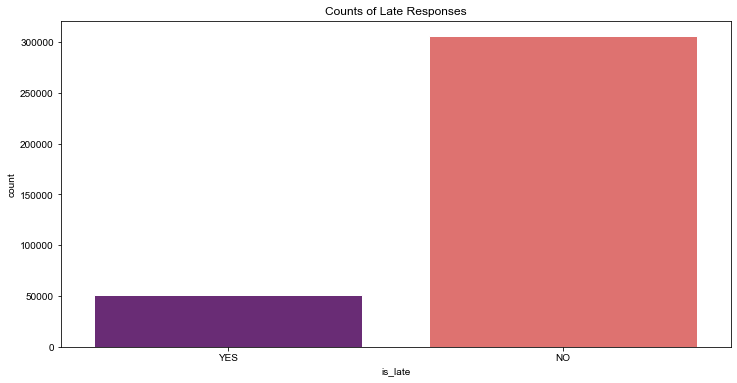

In [9]:
# Number of late responses. Majority of our data includes things that were completed on time.

plt.subplots(figsize=(12, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x = 'is_late', palette = 'magma').set_title('Counts of Late Responses')

Text(0.5, 1.0, 'Count of Calls by Department')

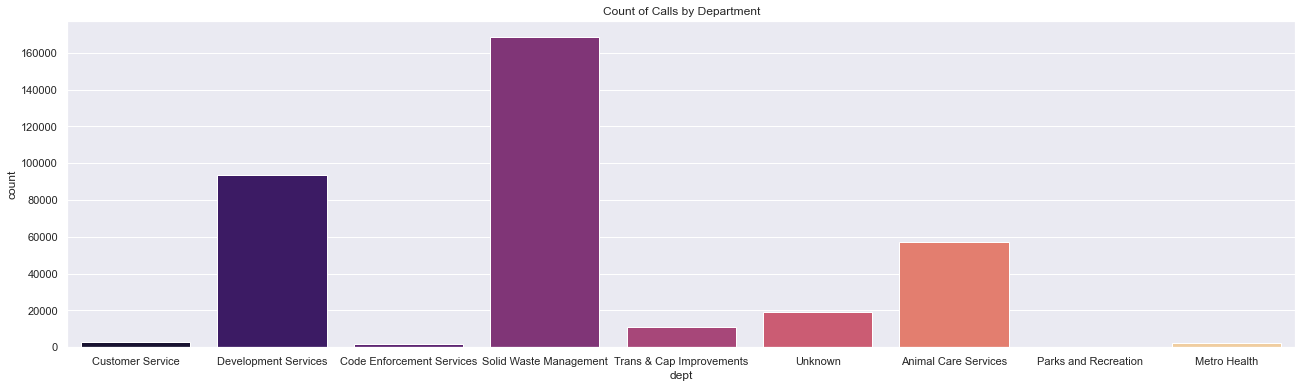

In [10]:
# A distribution of calls by department. Solid waste management makes up around half of all calls.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x = 'dept', palette = 'magma').set_title('Count of Calls by Department')

Text(0.5, 1.0, 'Count of Calls by Reason')

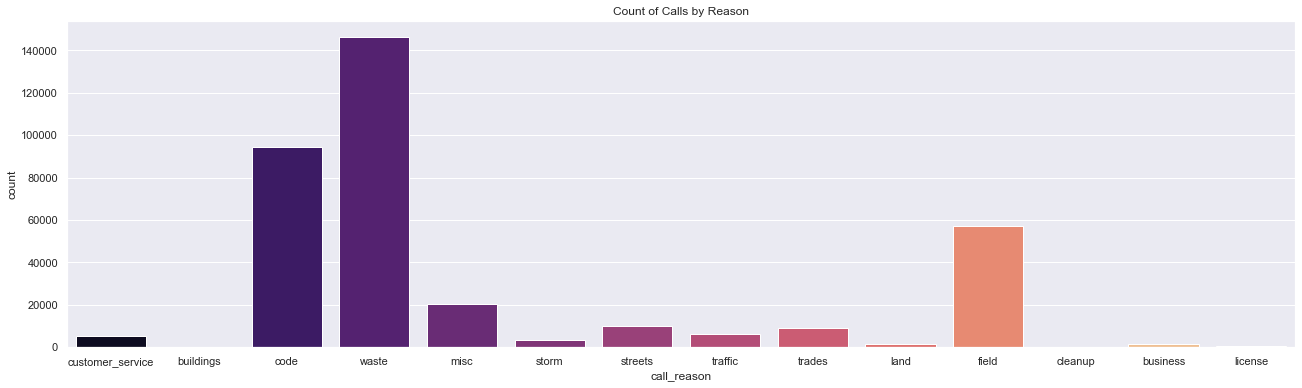

In [11]:
# A distribution of calls by reason. Obviously waste management is gonna make up a lot of calls.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x = 'call_reason', palette = "magma").set_title('Count of Calls by Reason')

Text(0.5, 1.0, 'Count of Calls by Source')

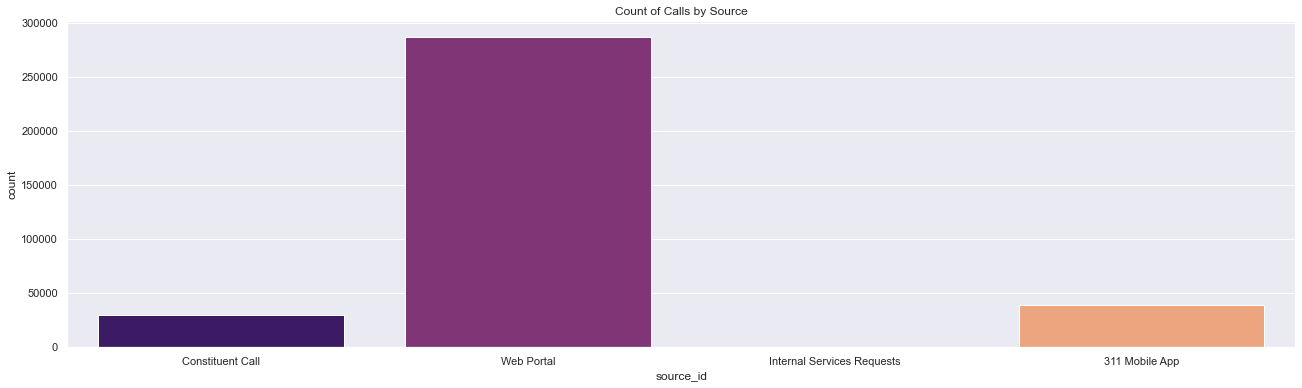

In [12]:
# A distribution of calls by source id. Most are submitted via the online web portal.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x = 'source_id', palette = "magma").set_title('Count of Calls by Source')

Text(0.5, 1.0, 'Count of Calls by District')

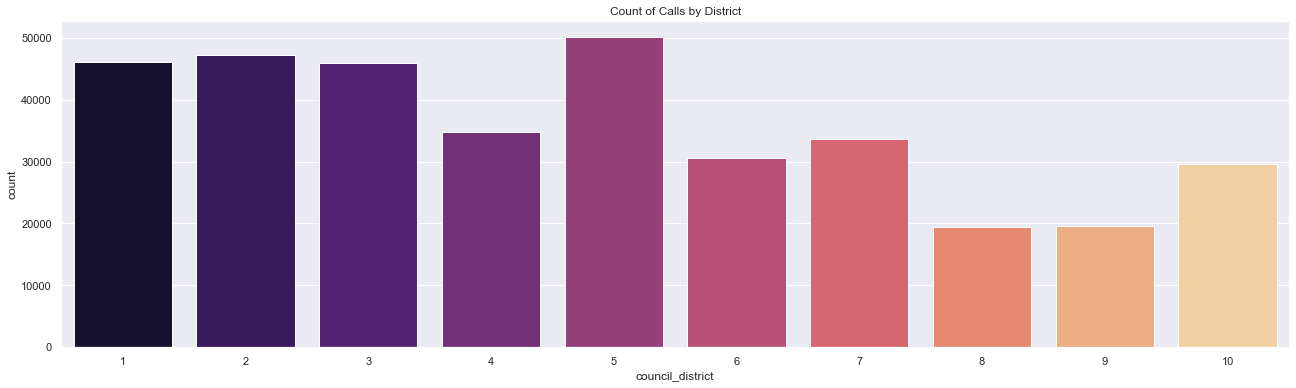

In [13]:
# A distribution of calls by council district. The northern districts seem to make 311 reports less often

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x = 'council_district', palette = "magma").set_title('Count of Calls by District')

Text(0.5, 1.0, 'Counts by Level of Delay')

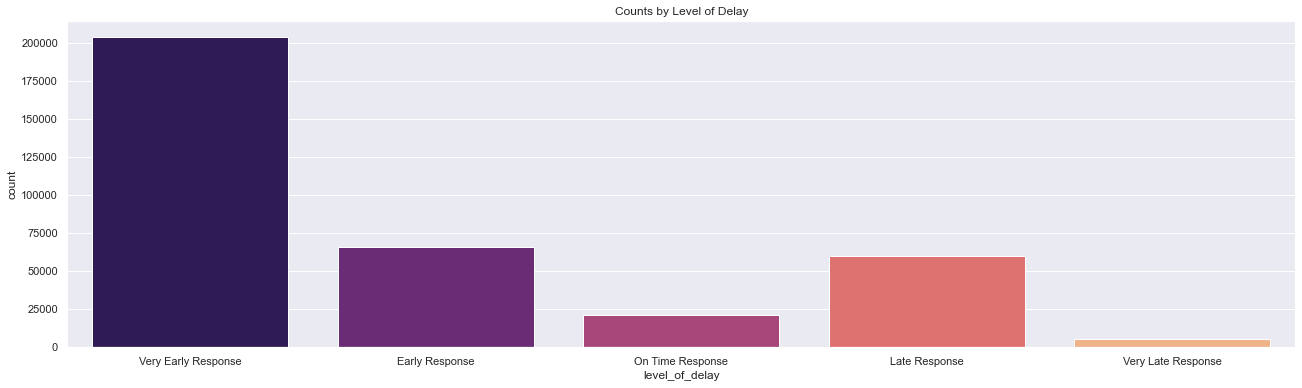

In [14]:
# A distribution of responses by how timely they were. Most responses are very early it would seem

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x = 'level_of_delay', palette = "magma").set_title('Counts by Level of Delay')

Text(0, 0.5, 'Number of Calls')

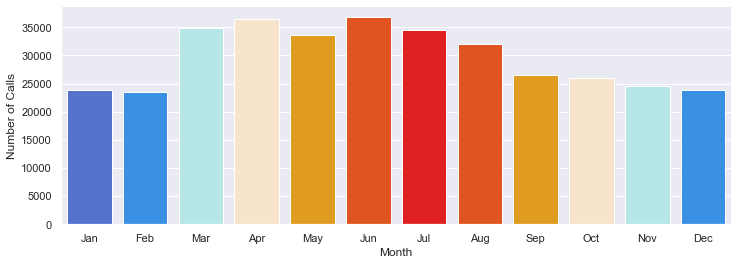

In [15]:
# A distribution of calls by month. Seems as though less calls are being made during the fall and winter months.
plt.subplots(figsize=(12, 4))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
clrs = ['royalblue', 'dodgerblue', 'paleturquoise', 'bisque', 'orange', 'orangered', 'red', 'orangered', 'orange', 'bisque', 'paleturquoise', 'dodgerblue']
sns.set_style(style='white') 
sns.despine()
sns.countplot(data = df, x = 'open_month', palette = clrs).set_xticklabels(months)
plt.xlabel('Month')
plt.ylabel('Number of Calls')

### Takeaways
- Most calls are answered before their due date
- Waste management and development services are the most called upon departments through 311
- Most 311 submissions are done through the web portal
- Northern districts have a much lower 311 call volume
- South, Central, and Eastern districts have the higher call volumes
- Most responses are extremely early
- Lower call volume during the fall and winter months.

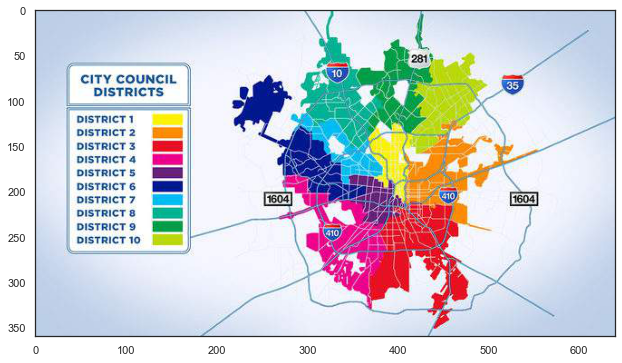

In [16]:
# A map for visualizing where each district lies.

plt.subplots(figsize=(16, 6))
img = mpimg.imread('council_map.jpg')
imgplot = plt.imshow(img)
plt.show()

### Bivariate

In [17]:
# Splitting the data

train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = wrangle.split_separate_scale(df)

In [18]:
# Creating dataframes to simplify exploration

district_df = explore.create_district_df(train)
zip_df = explore.create_zip_df(train)
dept_df = explore.create_dept_df(train)
call_reason_df = explore.create_call_reason_df(train)

Text(0.5, 1.0, 'Count of Calls by Month Opened')

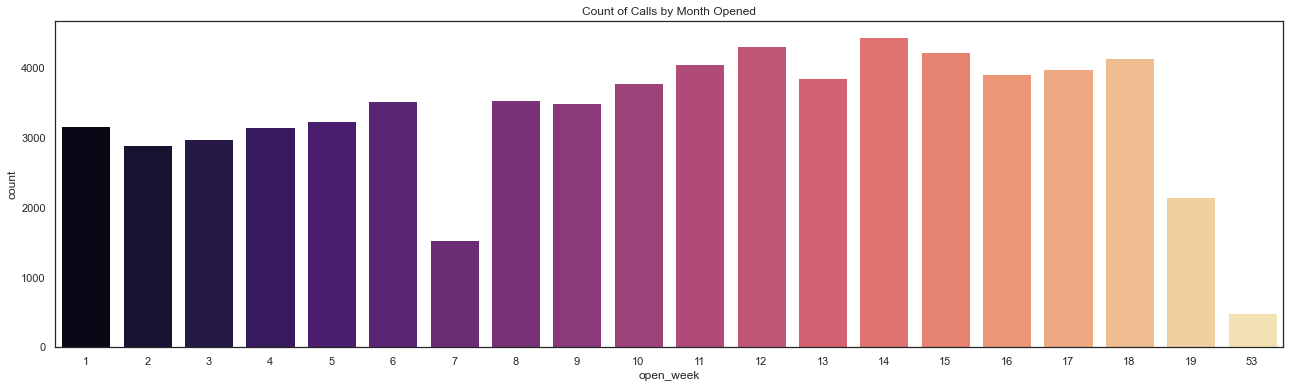

In [16]:
year_2021 = train[train['open_year'] == 2021]
# A distribution of calls by month. Seems as though less calls are being made during the fall and winter months.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = year_2021, x = 'open_week', palette = "magma").set_title('Count of Calls by Month Opened')

#### Response time by month and week

Text(0, 0.5, 'Average Response Time')

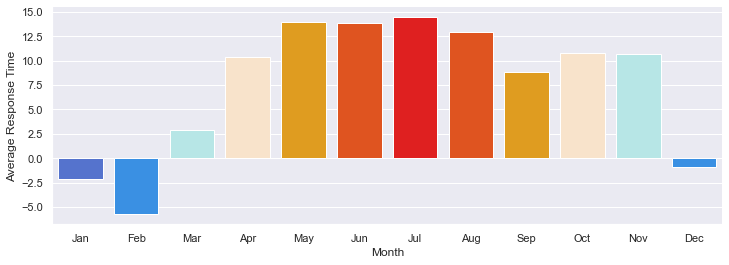

In [17]:
# Distribution of average response time by month

plt.subplots(figsize=(12, 4))
clrs = ['royalblue', 'dodgerblue', 'paleturquoise', 'bisque', 'orange', 'orangered', 'red', 'orangered', 'orange', 'bisque', 'paleturquoise', 'dodgerblue']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.set_style(style='white') 
sns.despine()
sns.barplot(data = train.groupby('open_month').mean().reset_index(), x = 'open_month', y = 'days_before_or_after_due', palette = clrs).set_xticklabels(months)
plt.xlabel('Month')
plt.ylabel('Average Response Time')

Text(0.5, 1.0, 'Average Days Before or After Due by Week')

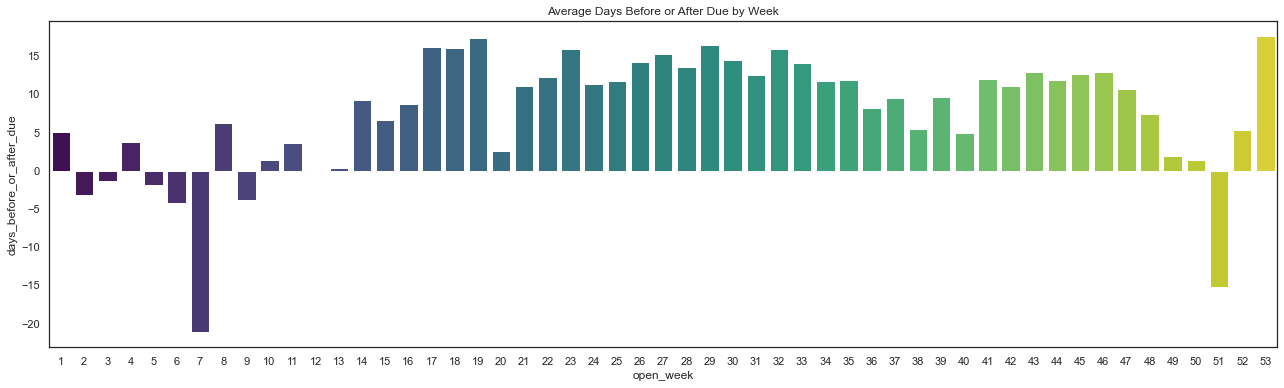

In [18]:
# Distribution of average response time by week of the year

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = train.groupby('open_week').mean().reset_index(), x = 'open_week', y = 'days_before_or_after_due', palette = "viridis").set_title('Average Days Before or After Due by Week')

#### Explore by Council District

In [19]:
def avg_days_by_district(train):
    district_df = create_district_df(train)
    plt.subplots(figsize=(22, 6))
    sns.set_theme(style="darkgrid")
    sns.barplot(data = district_df, x = 'council_district', y = 'days_before_or_after_due', palette = "viridis").set_title('Average Days Before or After Due')
    plt.xlabel('District')
    plt.ylabel('Average Response Time')

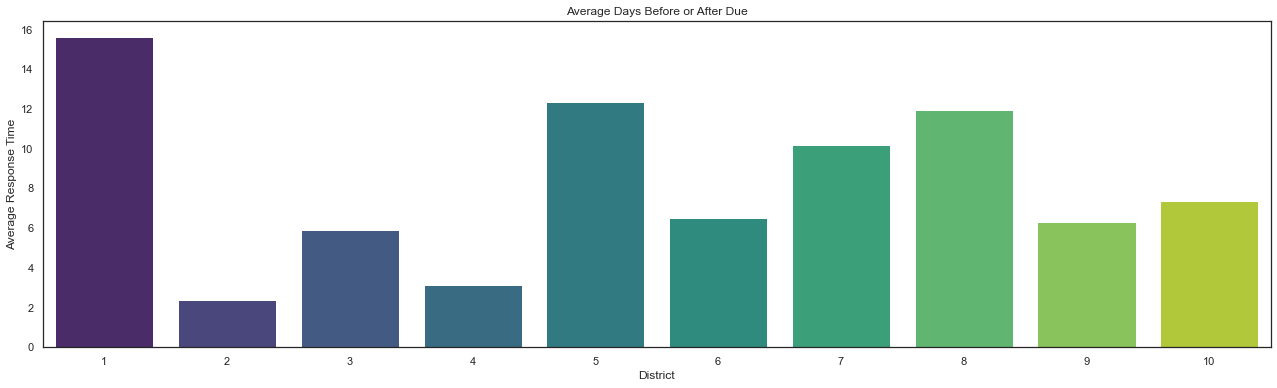

In [20]:
avg_days_by_district(train)

Text(0.5, 1.0, 'Average Days Before or After Due')

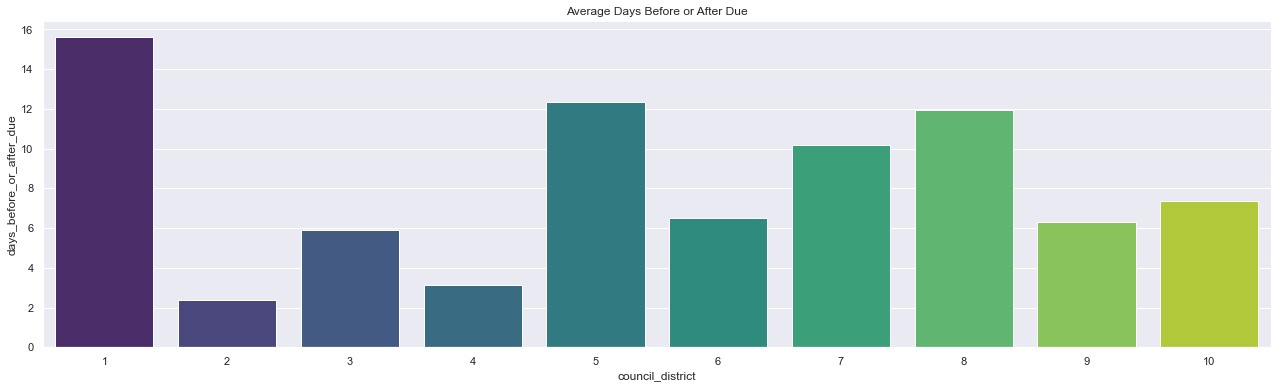

In [19]:
# Showing the days_before_or_after_due average by district, district 2 is the latest. Looks like those 
# northern districts are getting better service too. Although with the evening out that happens on median
# perhaps there are some outliers that are dragging the numbers down.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_df, x = 'council_district', y = 'days_before_or_after_due', palette = "viridis").set_title('Average Days Before or After Due')

Text(0.5, 1.0, 'Median Days Before or After Due')

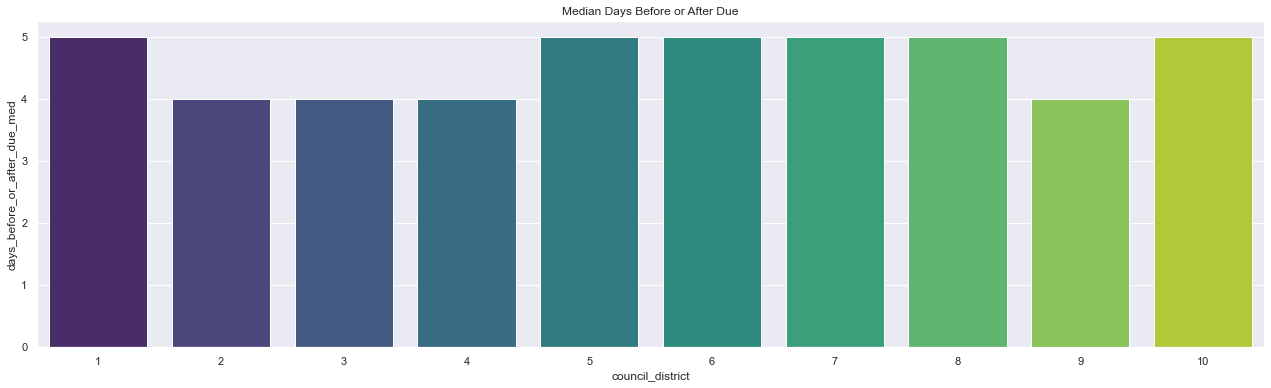

In [20]:
# Showing the days_before_or_after_due median by district, it would seem our data is heavily skewed to the left,
# since my median is giving me much lower numbers than my average, let's confirm this.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_df, x = 'council_district', y = 'days_before_or_after_due_med', palette = "viridis").set_title('Median Days Before or After Due')

Text(0.5, 1.0, 'Distribution of Days Before or After Due')

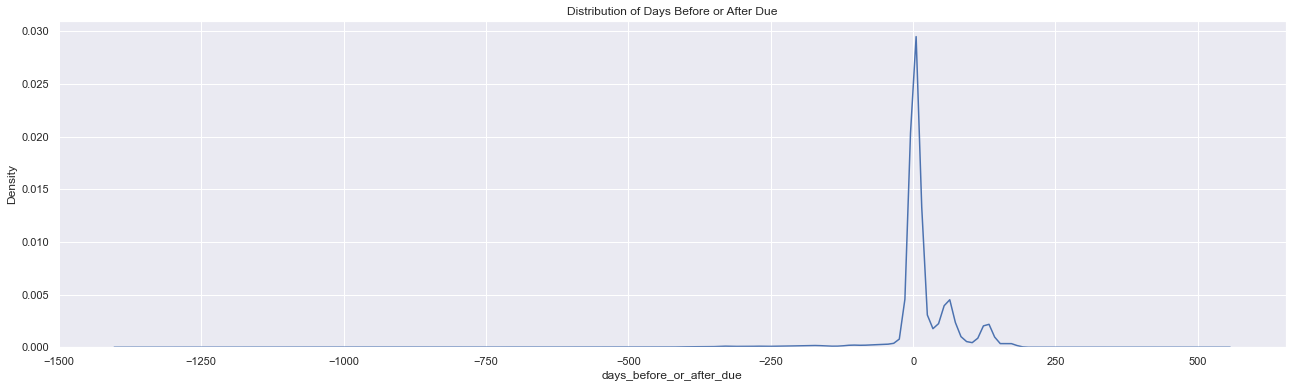

In [21]:
# It would appear that there is a large number of outliers that may be dragging our averages down

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.kdeplot(train['days_before_or_after_due']).set_title('Distribution of Days Before or After Due')

Text(0.5, 1.0, 'Median Number of Days Open')

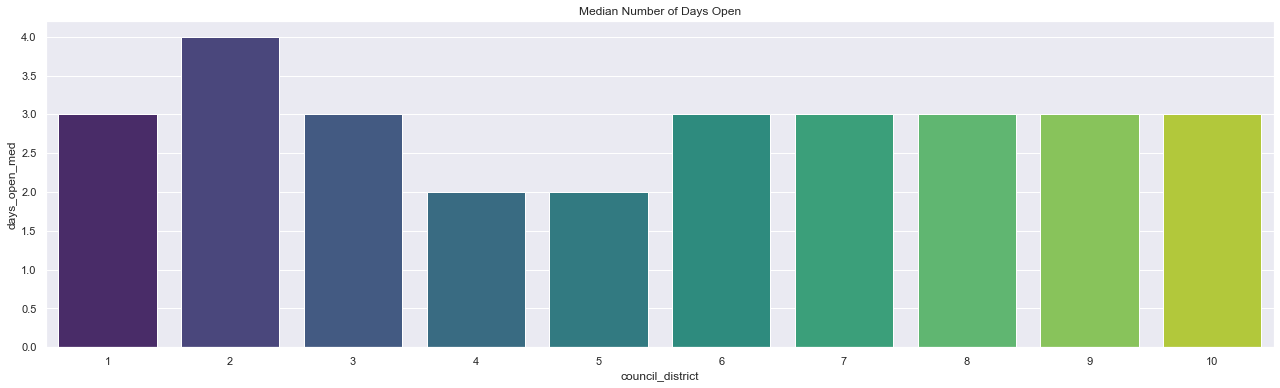

In [22]:
# Showing median days open by district

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_df, x = 'council_district', y = 'days_open_med', palette = "viridis").set_title('Median Number of Days Open')

Text(0.5, 1.0, 'Average Time Allotted for Task')

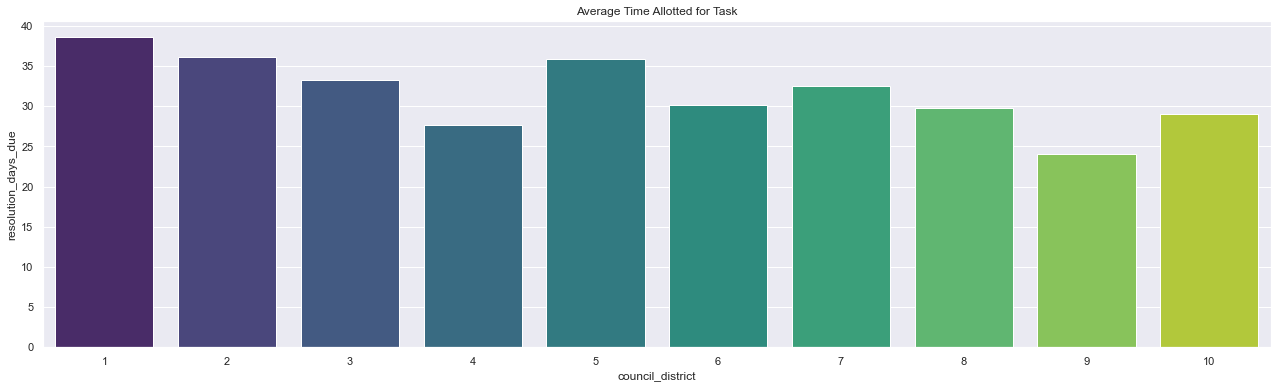

In [23]:
# Plotting average amount of time tasks are given to be completed by district

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_df, x = 'council_district', y = 'resolution_days_due', palette = "viridis").set_title('Average Time Allotted for Task')

#### Takeaways:
- Eastern Southern, and Western districts had the worst average response times.
- 

#### Level of Delay by District

Text(0.5, 1.0, 'District 1')

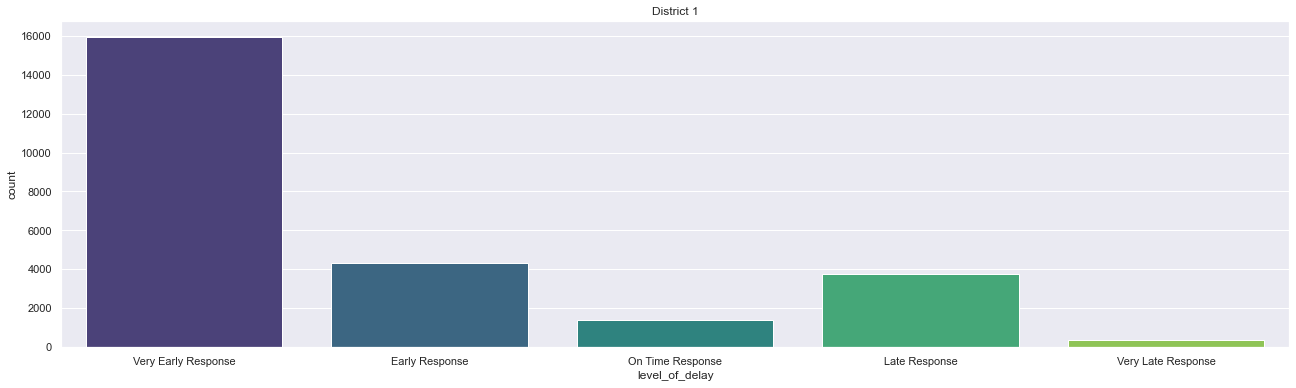

In [24]:
# Counts of level of delay by district 1

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = train[train['council_district'] == 1], x = 'level_of_delay', palette = "viridis").set_title('District 1')

Text(0.5, 1.0, 'District 2')

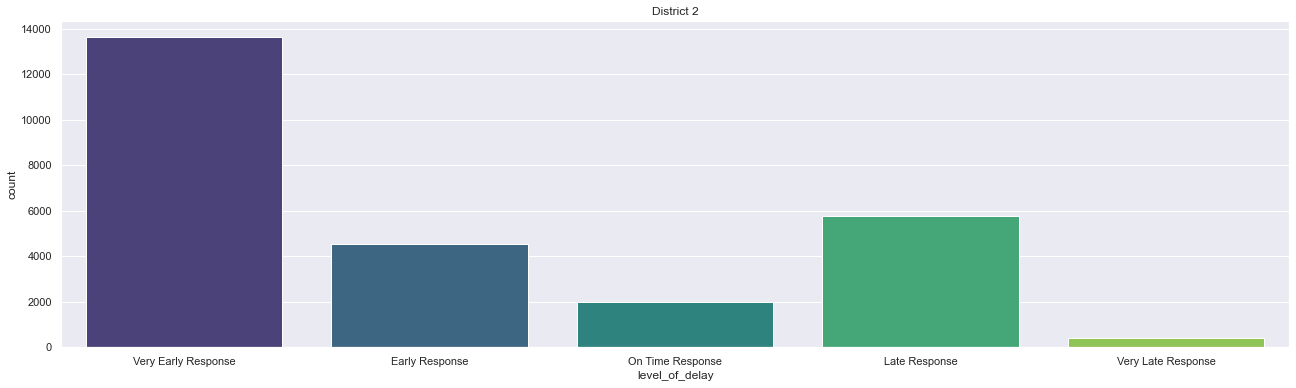

In [25]:
# Counts of level of delay by district 2

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = train[train['council_district'] == 2], x = 'level_of_delay', palette = "viridis").set_title('District 2')

Text(0.5, 1.0, 'District 3')

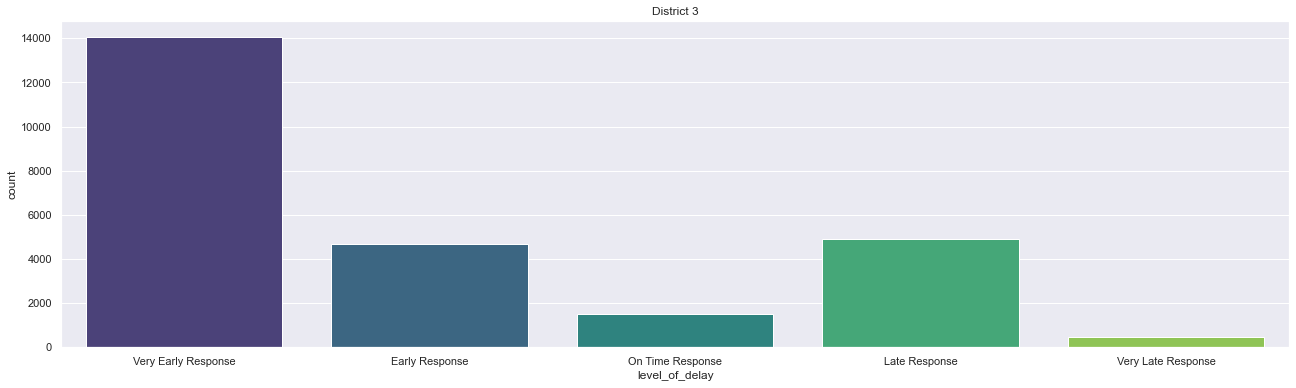

In [26]:
# Counts of level of delay by district 3

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = train[train['council_district'] == 3], x = 'level_of_delay', palette = "viridis").set_title('District 3')

Text(0.5, 1.0, 'District 4')

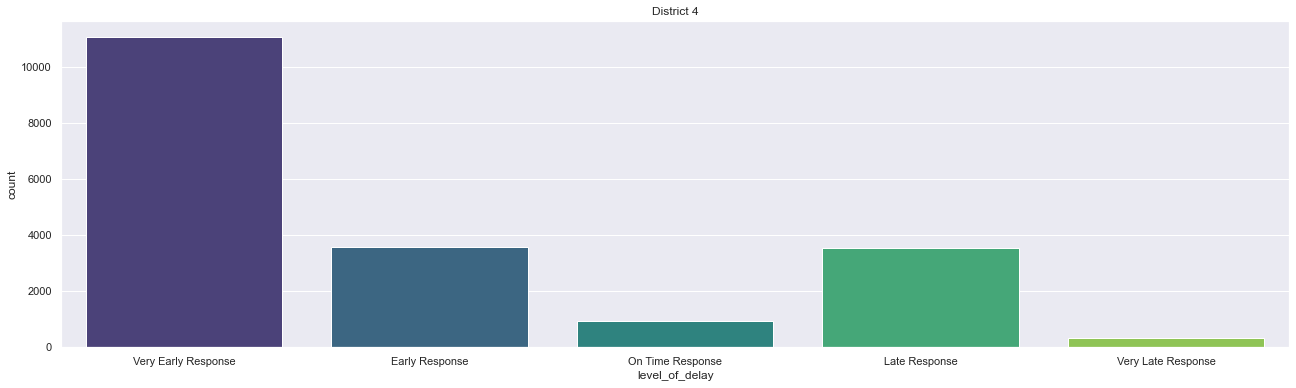

In [27]:
# Counts of level of delay by district 4

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = train[train['council_district'] == 4], x = 'level_of_delay', palette = "viridis").set_title('District 4')

Text(0.5, 1.0, 'District 5')

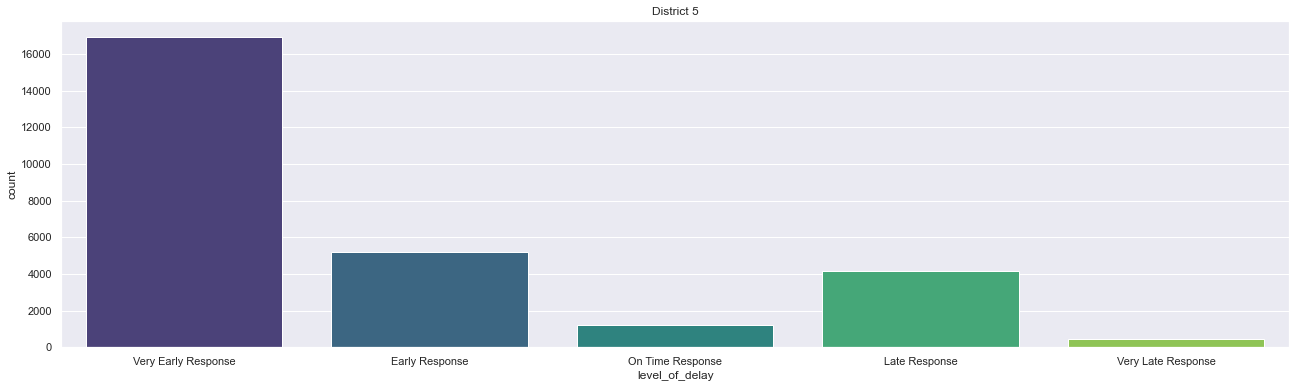

In [28]:
# Counts of level of delay by district 5

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = train[train['council_district'] == 5], x = 'level_of_delay', palette = "viridis").set_title('District 5')

Text(0.5, 1.0, 'District 6')

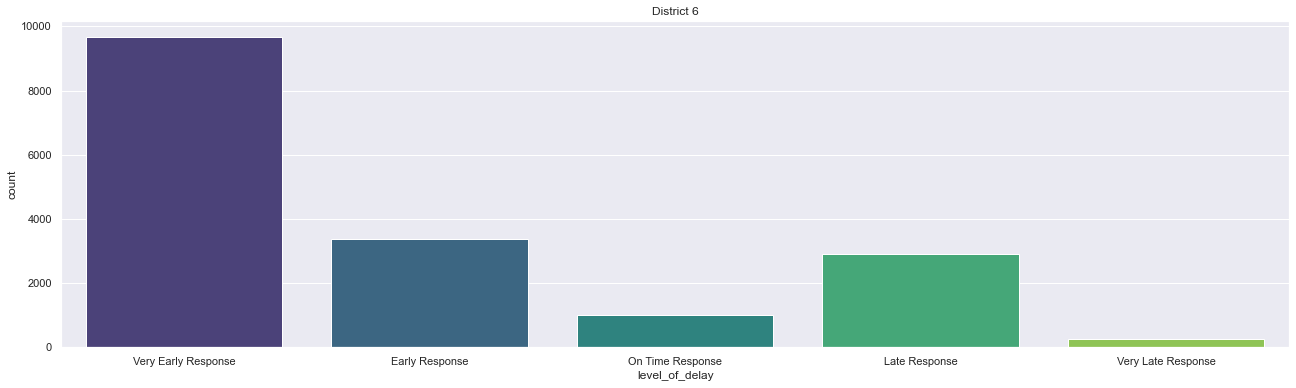

In [29]:
# Counts of level of delay by district 6

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = train[train['council_district'] == 6], x = 'level_of_delay', palette = "viridis").set_title('District 6')

Text(0.5, 1.0, 'District 7')

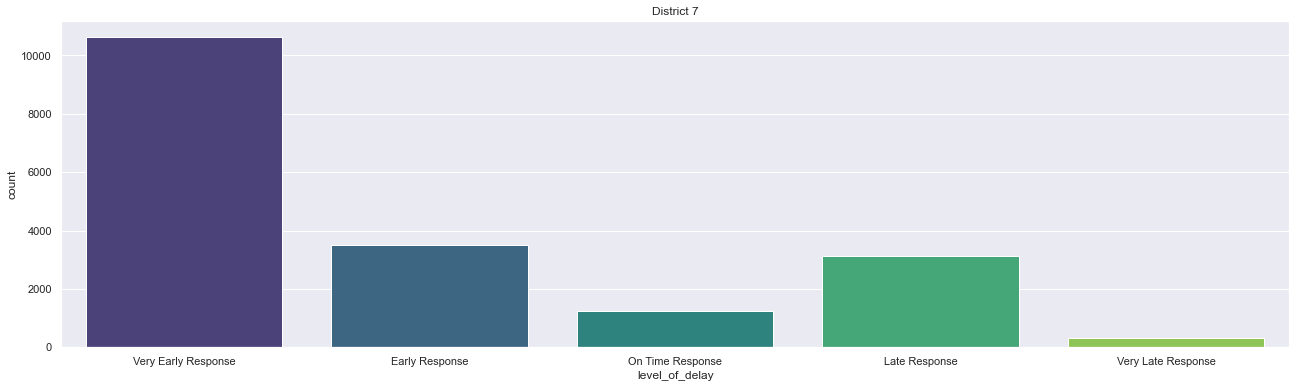

In [30]:
# Counts of level of delay by district 7

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = train[train['council_district'] == 7], x = 'level_of_delay', palette = "viridis").set_title('District 7')

Text(0.5, 1.0, 'District 8')

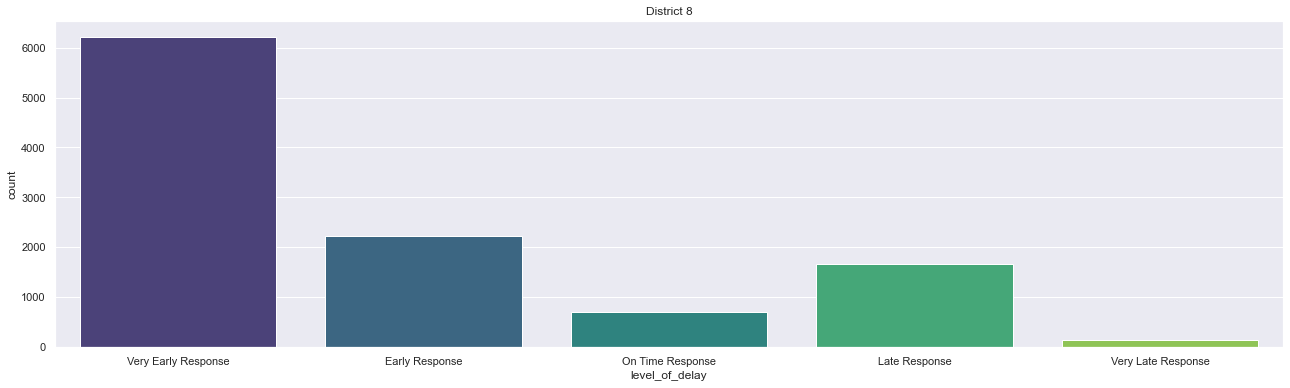

In [31]:
# Counts of level of delay by district 8

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = train[train['council_district'] == 8], x = 'level_of_delay', palette = "viridis").set_title('District 8')

Text(0.5, 1.0, 'District 9')

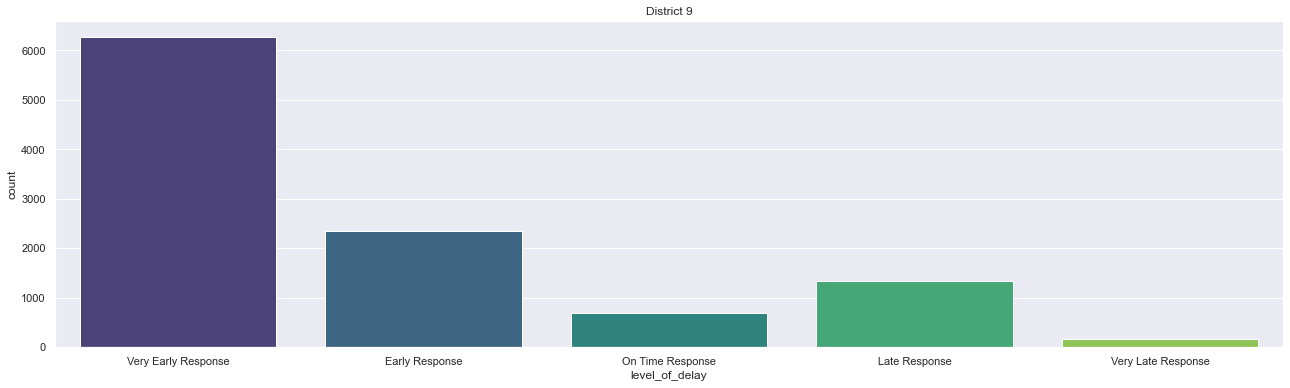

In [32]:
# Counts of level of delay by district 9

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = train[train['council_district'] == 9], x = 'level_of_delay', palette = "viridis").set_title('District 9')

Text(0.5, 1.0, 'District 10')

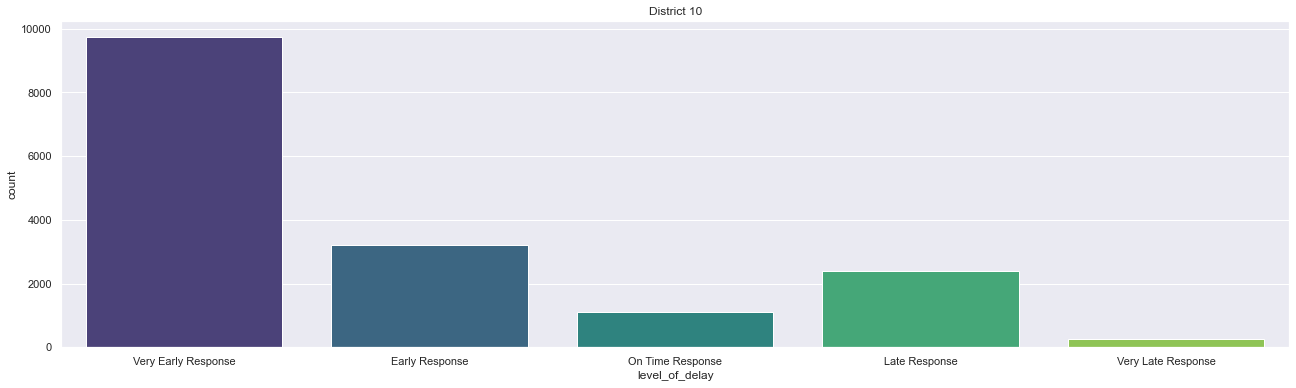

In [33]:
# Counts of level of delay by district 10

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = train[train['council_district'] == 10], x = 'level_of_delay', palette = "viridis").set_title('District 10')

#### Call Reason

Text(0.5, 1.0, 'Count of Calls by Reason')

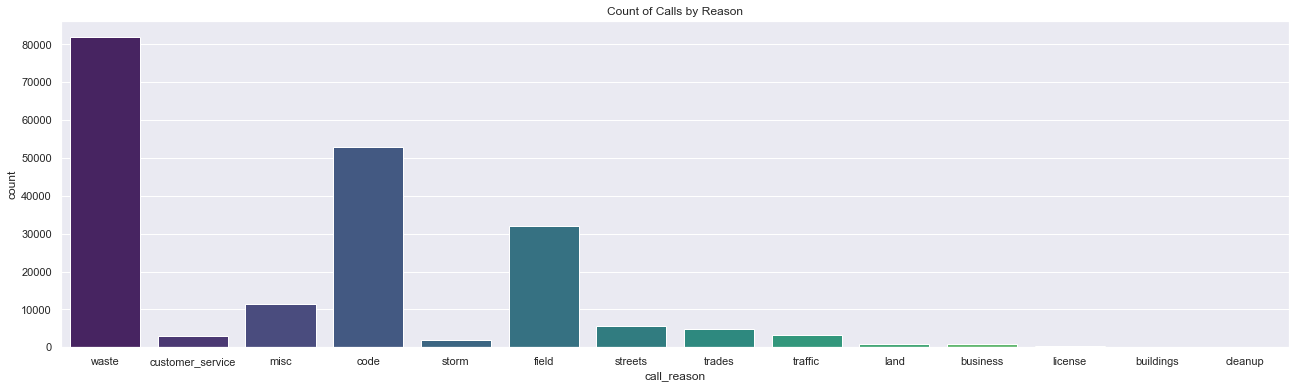

In [34]:
# Showing the counts of calls by call reason, waste is the most called on, followed by code violations 
# and field(animals)

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = train, x = 'call_reason', palette = "viridis").set_title('Count of Calls by Reason')

Text(0.5, 1.0, 'Average Days Before or After Due Date by Reason')

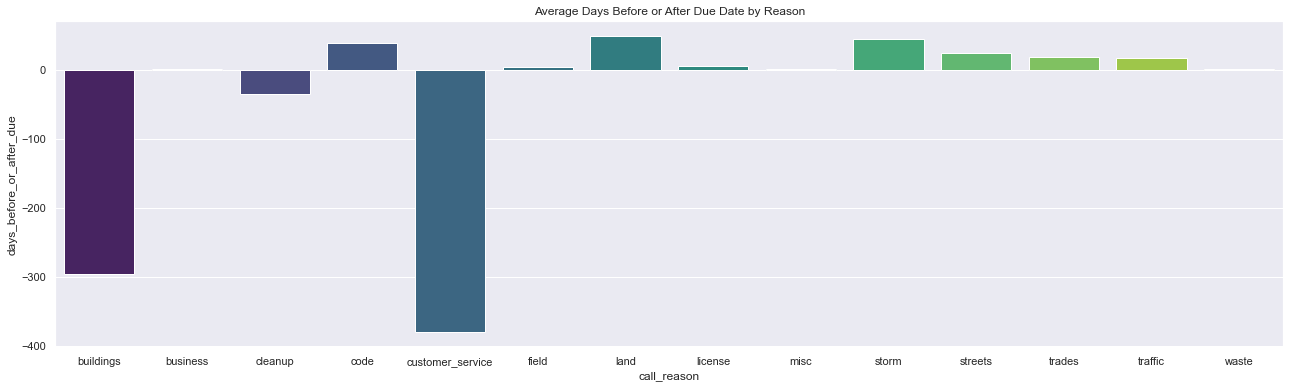

In [35]:
# Showing the days_before_or_after_due average by call reason, buildings obviously taking the longest and cleanup 
# is also regularly late. Customer service may appear to perform poorly because their tasks are typically 
# given low priority.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = call_reason_df, x = 'call_reason', y = 'days_before_or_after_due', palette = "viridis").set_title('Average Days Before or After Due Date by Reason')

Text(0.5, 1.0, 'Average Days a Case is Open by Reason')

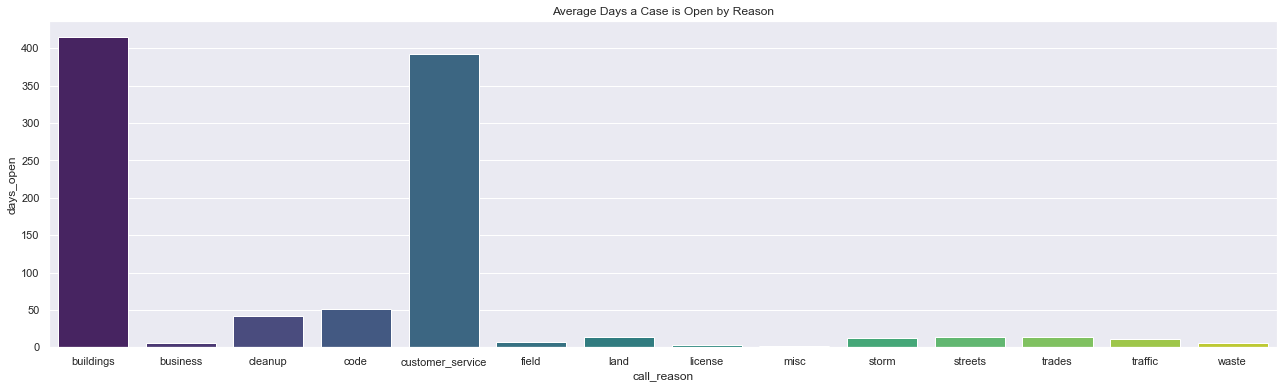

In [36]:
# Showing the days_open average by call reason, customer service is alotted the most time but also end up the most late,
# same goes for buildings. I would assume it's harder to pinpoint when a task will be done if the assignment
# has a longer due date (more room for complications)

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = call_reason_df, x = 'call_reason', y = 'days_open', palette = "viridis").set_title('Average Days a Case is Open by Reason')

#### Takeaways:
- Waste is the most common reason for 311 reports, followed by code violations, and then field(animals)
- Buildings and customer service  are typically alotted more time but also end up later

#### Explore by Department

Text(0, 0.5, 'Count of Calls')

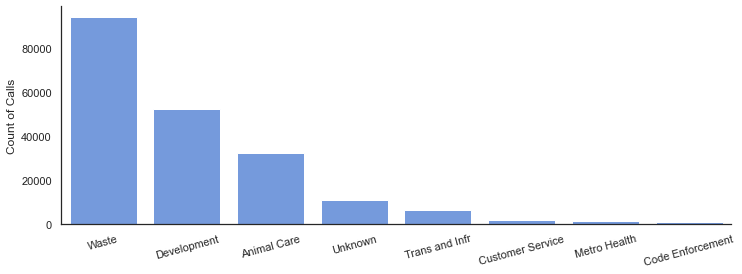

In [110]:
# Showing the counts of calls by dept, solid waste management is the most called on by far, removing parks and rec
# since they only have 2 observations

trainzz = train[train['dept'] != 'Parks and Recreation']
trainzz = trainzz.replace('Trans & Cap Improvements', 'Trans and Infr')
trainzz = trainzz.replace('Solid Waste Management', 'Waste')
trainzz = trainzz.replace('Development Services', 'Development')
trainzz = trainzz.replace('Code Enforcement Services', 'Code Enforcement')
trainzz = trainzz.replace('Animal Care Services', 'Animal Care')
plt.subplots(figsize=(12, 4))
sns.despine()
sns.countplot(data = trainzz, x = 'dept', color = "cornflowerblue", order = trainzz['dept'].value_counts().index)
plt.xticks(rotation = 15)
plt.xlabel('')
plt.ylabel('Count of Calls')

In [114]:
dept_df

,dept,days_open,days_before_or_after_due,resolution_days_due,days_open_med,days_before_or_after_due_med,resolution_days_due_med
0,Animal Care,7.503623,4.545664,12.049286,1.0,1.0,4
1,Code Enforcement,286.832640,-207.346154,79.486486,302.0,-225.0,66
2,Customer Service,746.024951,-737.254760,8.770190,718.0,-710.0,8
3,Development,47.626588,43.417382,91.043970,8.0,62.0,68
4,Metro Health,4.506464,3.137643,7.644106,4.0,3.0,7
5,Waste,5.307064,1.961575,7.268639,2.0,4.0,8
6,Trans and Infr,12.457402,24.077259,36.534661,4.0,13.0,29
7,Unknown,16.293322,18.534871,34.828193,4.0,8.0,15


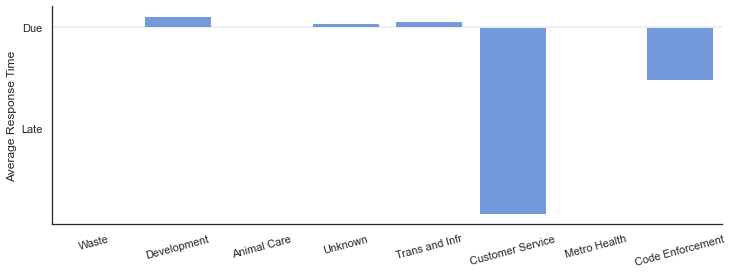

In [119]:
# Showing the average response time by dept, solid waste management is the most called on by far

dept_df = dept_df[dept_df['dept'] != 'Parks and Recreation']
dept_df = dept_df.replace('Trans & Cap Improvements', 'Trans and Infr')
dept_df = dept_df.replace('Solid Waste Management', 'Waste')
dept_df = dept_df.replace('Development Services', 'Development')
dept_df = dept_df.replace('Code Enforcement Services', 'Code Enforcement')
dept_df = dept_df.replace('Animal Care Services', 'Animal Care')
plt.subplots(figsize=(12, 4))
sns.despine()
sns.set_style(style='white') 
g = sns.barplot(data = dept_df.reindex([5, 3, 0, 7, 6, 2, 4, 1]), x = 'dept', y = 'days_before_or_after_due', color = 'cornflowerblue')
plt.xlabel('')
plt.ylabel('Average Response Time')
positions = (-700, -400, 0)
labels = ("", "Late", "Due")
plt.yticks(positions, labels)
plt.xticks(rotation = 15)
g.axhline(0, linewidth = .2)

Text(0.5, 1.0, 'Average Days Before or After Due Date by Department')

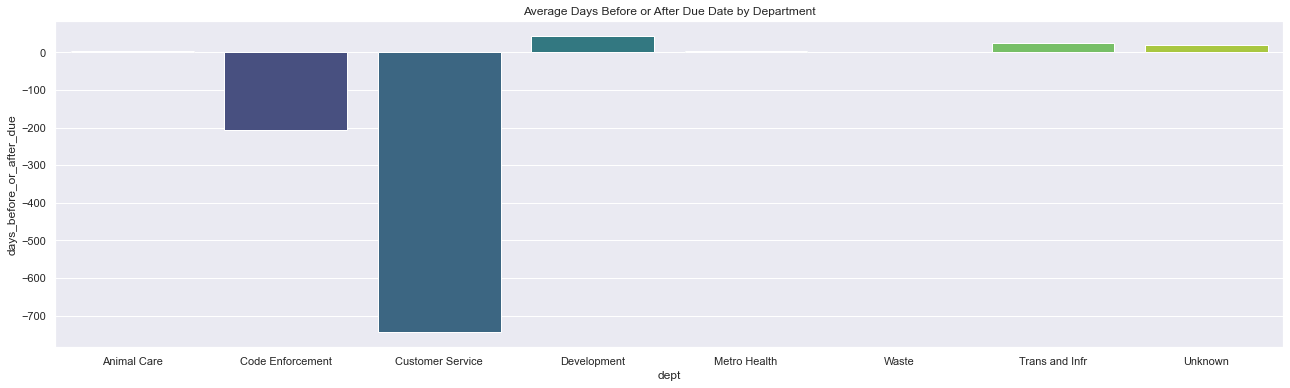

In [40]:
# Showing the days_before_or_after_due average by dept, with the consistency of district response times in 
# comparison, it would seem department and call_reason are large indicators of how early/late a task will be done

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = dept_df, x = 'dept', y = 'days_before_or_after_due', palette = "viridis").set_title('Average Days Before or After Due Date by Department')

Text(0.5, 1.0, 'Average Days a Case is Open by Department')

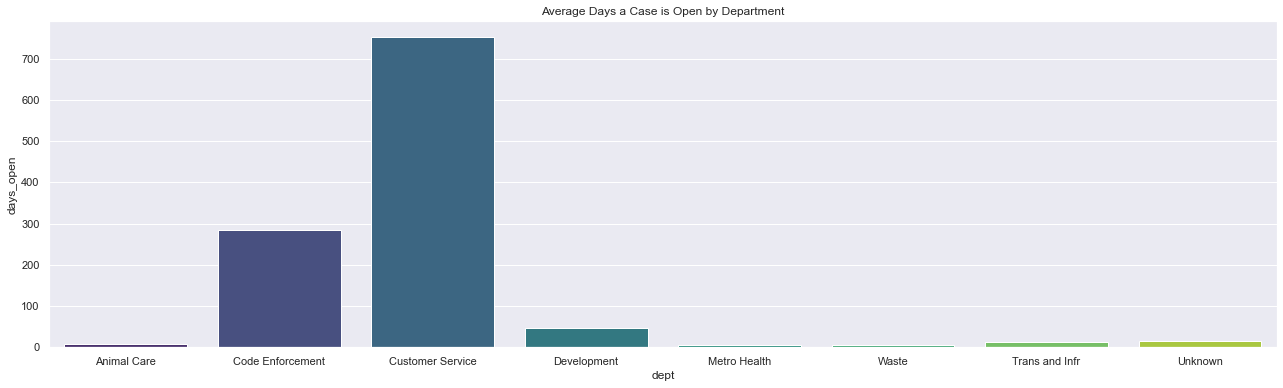

In [41]:
# Showing the days_open average by dept, it would seem the more days a department is assigned to get a task done
# the more likely they are to be late. Maybe because long term projects are more difficult to predict?

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = dept_df, x = 'dept', y = 'days_open', palette = "viridis").set_title('Average Days a Case is Open by Department')

Text(0.5, 1.0, 'Average Days Assigned for a Task by Department')

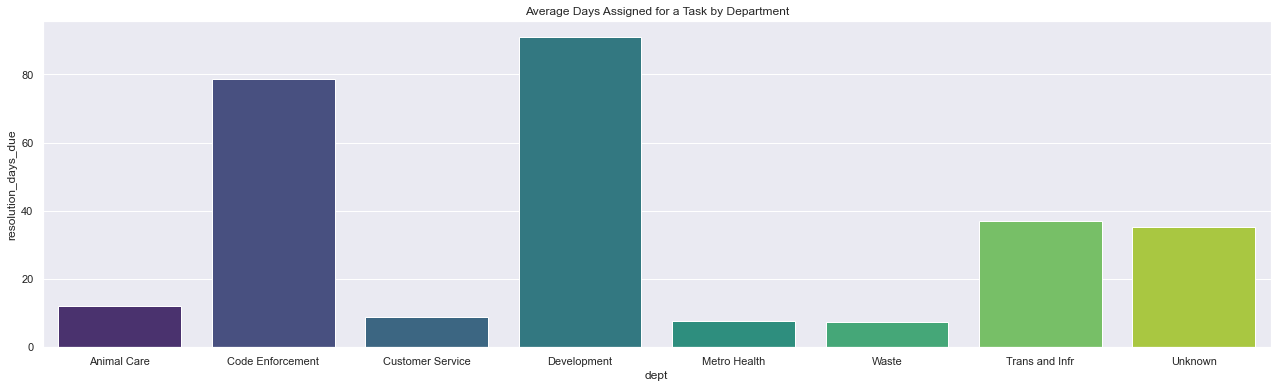

In [42]:
# Showing the days assigned average by dept

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = dept_df, x = 'dept', y = 'resolution_days_due', palette = "viridis").set_title('Average Days Assigned for a Task by Department')

### Takeaways
- Data is skewed to the left. Although this points to some problems with the data, it also points to the fact that there are a some very late cases South, Central, and Eastern districts
- Districts 2, 3, 4, and 5 had higher proportions of "Late Response"

### Multivariate

#### Subsetting by department and then looking at levels of delay and response time by district

In [43]:
waste_df = train[train['dept'] == 'Solid Waste Management']
trans_df = train[train['dept'] == 'Trans & Cap Improvements']
cust_df = train[train['dept'] == 'Customer Service']
unk_df = train[train['dept'] == 'Unknown']
metro_df = train[train['dept'] == 'Metro Health']
dev_df = train[train['dept'] == 'Development Services']
animal_df = train[train['dept'] == 'Animal Care Services']
code_df = train[train['dept'] == 'Code Enforcement Services']
parks_df = train[train['dept'] == 'Parks and Recreation']
district_waste_df, district_trans_df, district_cust_df, district_unk_df, district_metro_df, district_dev_df, district_animal_df, district_code_df, district_parks_df = explore.org_multivariate_data(train)

#### Waste Management

Text(0.5, 1.0, 'Waste Management Calls by District')

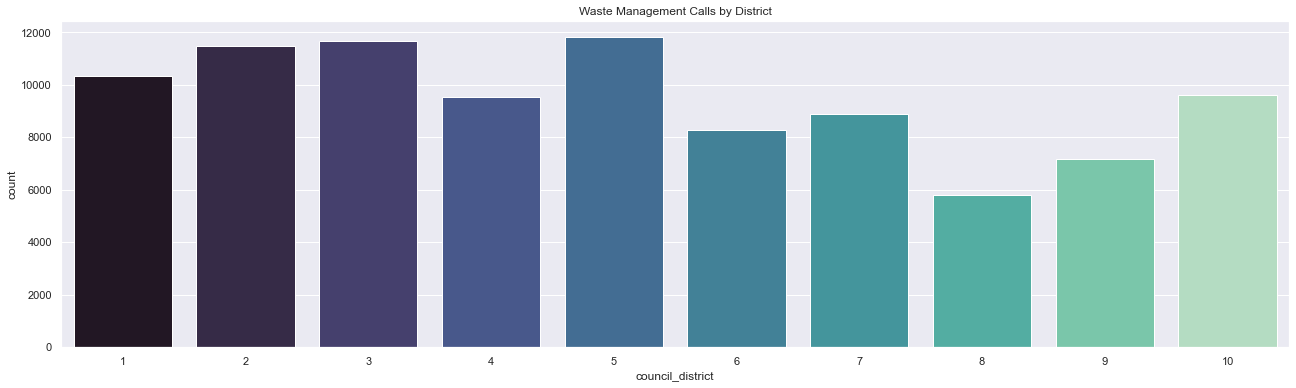

In [44]:
# Counts of reports for waste management by council district, lower calls in the northern districts

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = waste_df, x = 'council_district', palette = "mako").set_title('Waste Management Calls by District')

Text(0.5, 1.0, 'Average Response Time for Waste Management by District')

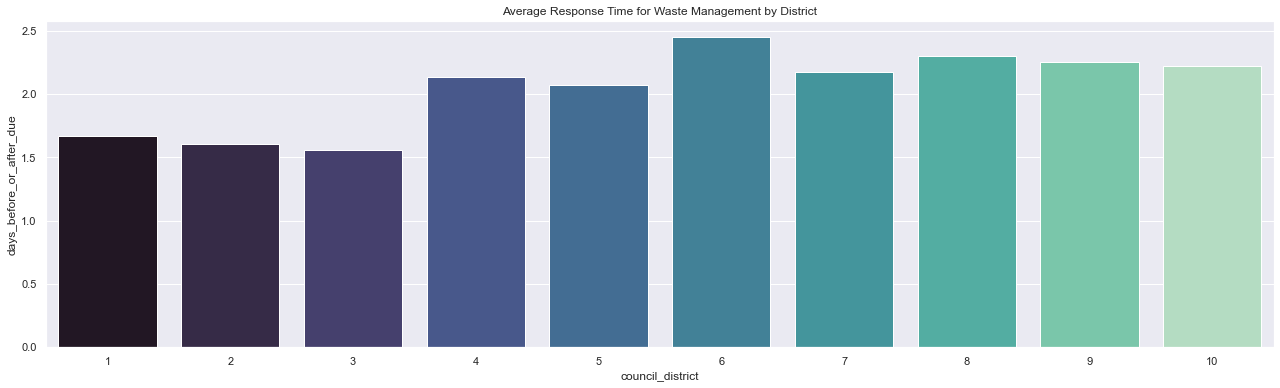

In [45]:
# Average response time by district for waste management department. Waste management is worse about getting to
# southern/eastern/downtown areas, though their call volume is higher down there.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_waste_df, x = 'council_district', y = 'days_before_or_after_due', palette = "mako").set_title('Average Response Time for Waste Management by District')

Text(0.5, 1.0, 'Waste Management Levels of Delay')

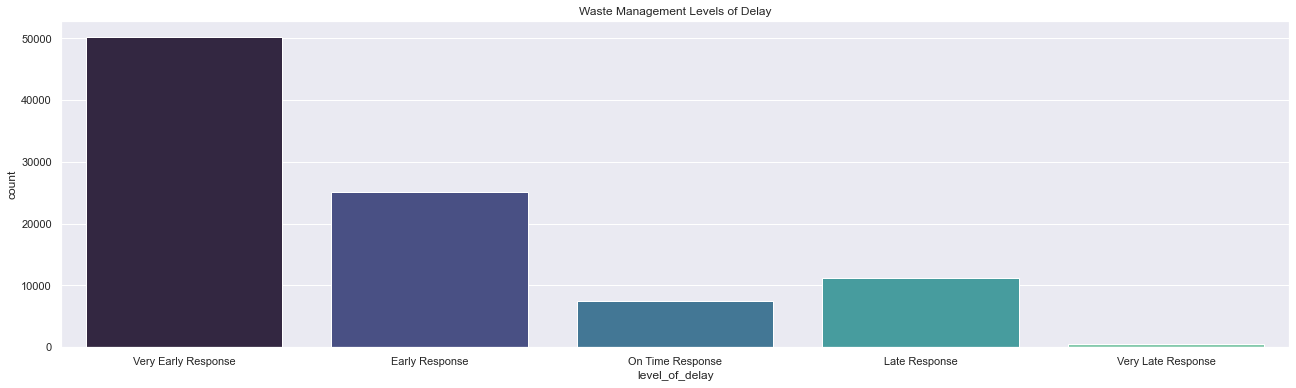

In [46]:
# Counts of level of delay for waste management

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = waste_df, x = 'level_of_delay', palette = "mako").set_title('Waste Management Levels of Delay')

#### Transportation

Text(0.5, 1.0, 'Transportation Calls by District')

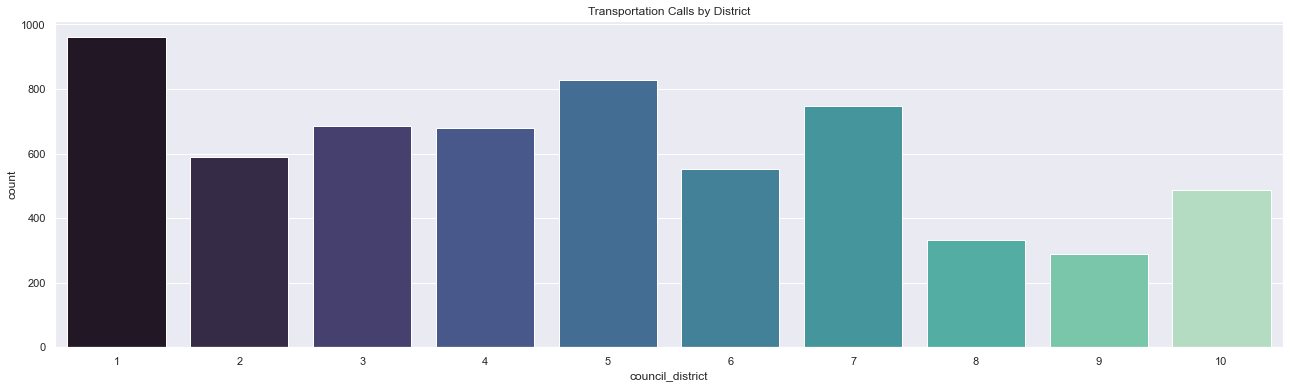

In [47]:
# Counts of reports for transportation by council district, there's a lot of calls for transportation in district 1
# a downtown area
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = trans_df, x = 'council_district', palette = "mako").set_title('Transportation Calls by District')

Text(0.5, 1.0, 'Average Response Time for Transportation by District')

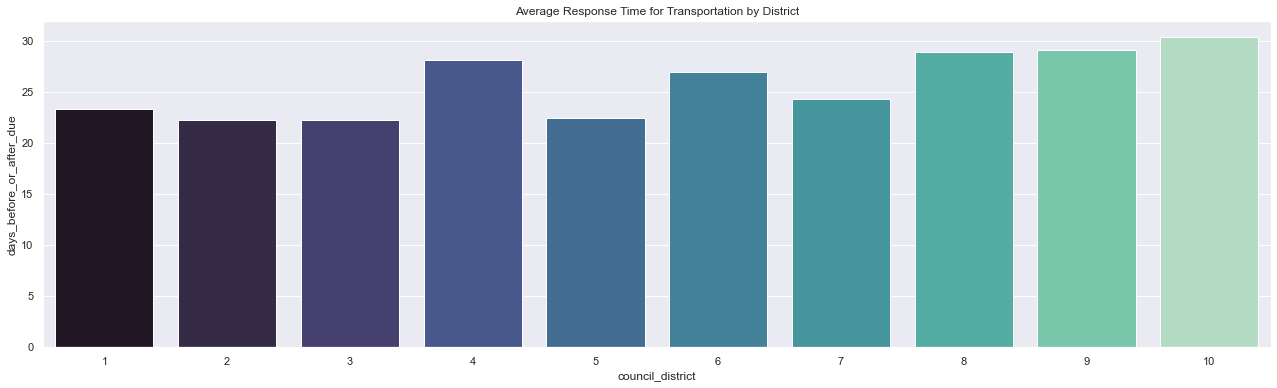

In [48]:
# Average response time by district for transportation department.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_trans_df, x = 'council_district', y = 'days_before_or_after_due', palette = "mako").set_title('Average Response Time for Transportation by District')

Text(0.5, 1.0, 'Transportation Levels of Delay')

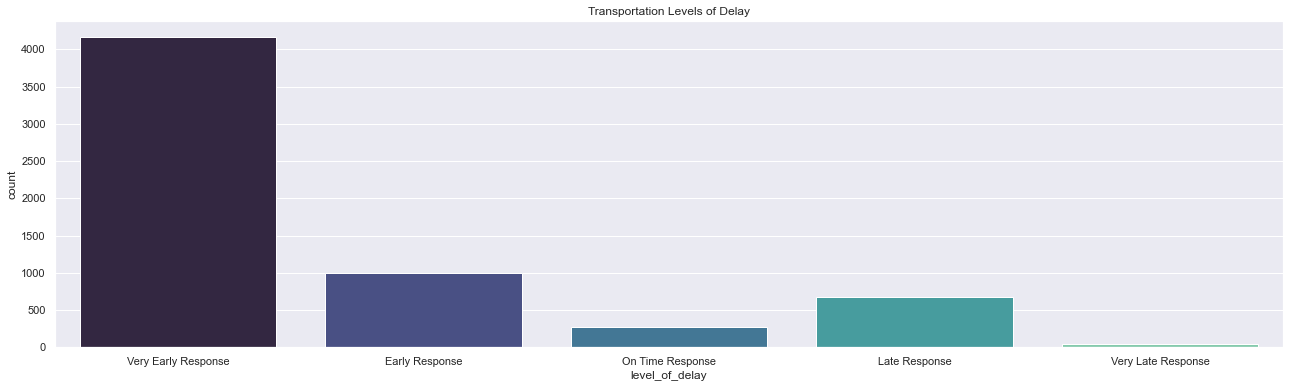

In [49]:
# Counts of level of delay for transportation department

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = trans_df, x = 'level_of_delay', palette = "mako").set_title('Transportation Levels of Delay')

#### Customer Service

Text(0.5, 1.0, 'Customer Service Calls by District')

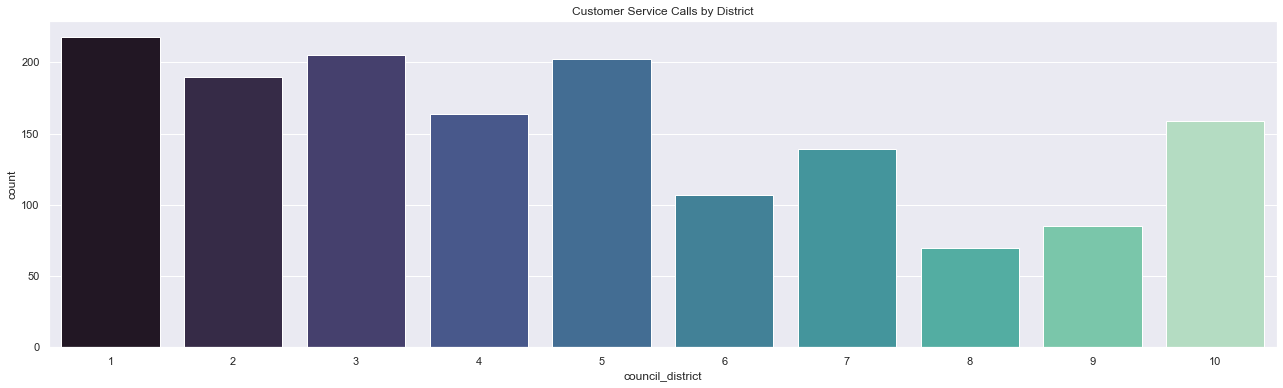

In [50]:
# Counts of reports for customer service by council district, there's a small number of calls for district 8 and 9

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = cust_df, x = 'council_district', palette = "mako").set_title('Customer Service Calls by District')

Text(0.5, 1.0, 'Average Response Time for Customer Service by District')

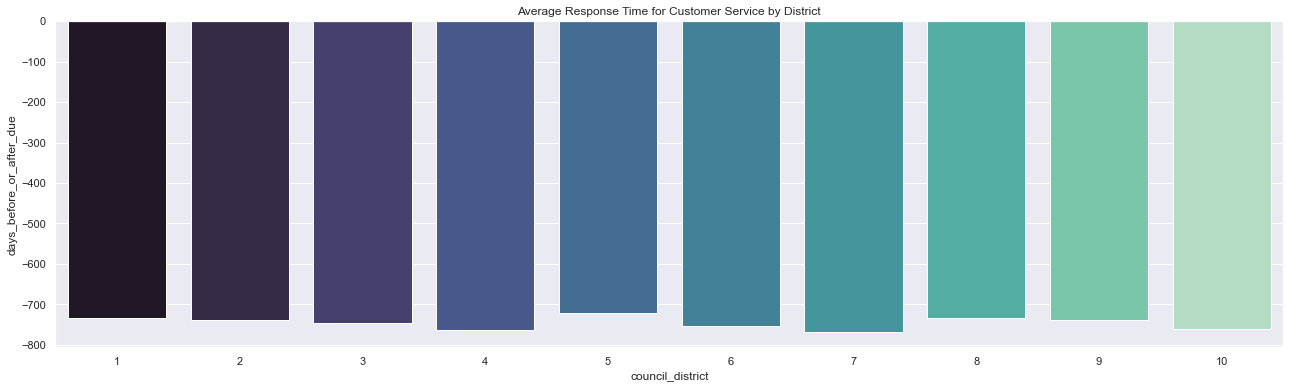

In [51]:
# Average response time by district for customer service department.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_cust_df, x = 'council_district', y = 'days_before_or_after_due', palette = "mako").set_title('Average Response Time for Customer Service by District')

Text(0.5, 1.0, 'Customer Service Levels of Delay')

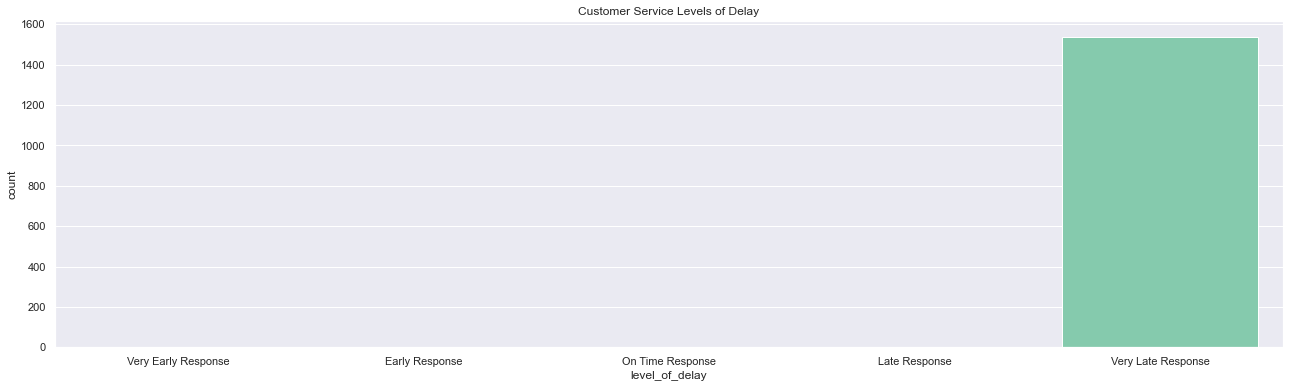

In [52]:
# Counts of level of delay for customer service, most if not all of their calls are very late responses

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = cust_df, x = 'level_of_delay', palette = "mako").set_title('Customer Service Levels of Delay')

#### Metro Health

Text(0.5, 1.0, 'Metro Health Calls by District')

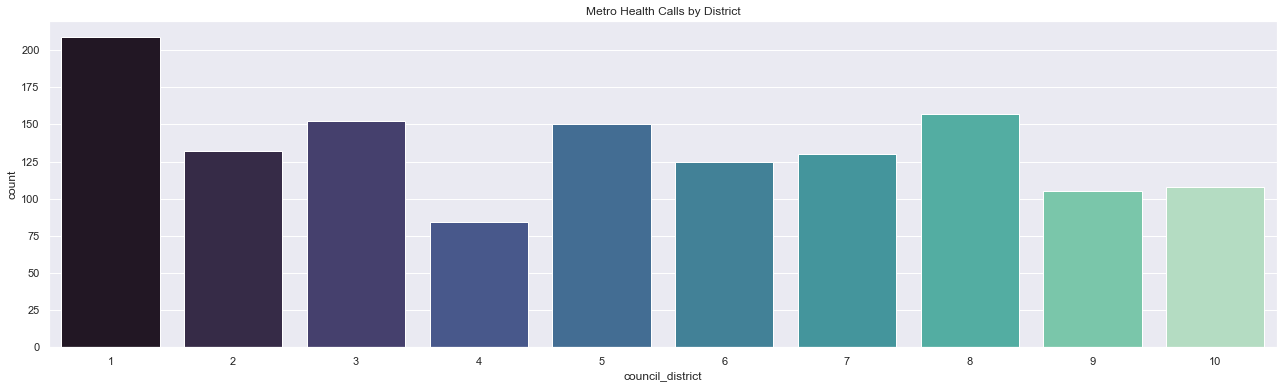

In [53]:
# Counts of reports for metro health by council district. A lot in district 1 maybe because downtown has a higher
# concentration of restaurants?

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = metro_df, x = 'council_district', palette = "mako").set_title('Metro Health Calls by District')

Text(0.5, 1.0, 'Average Response Time for Metro Health by District')

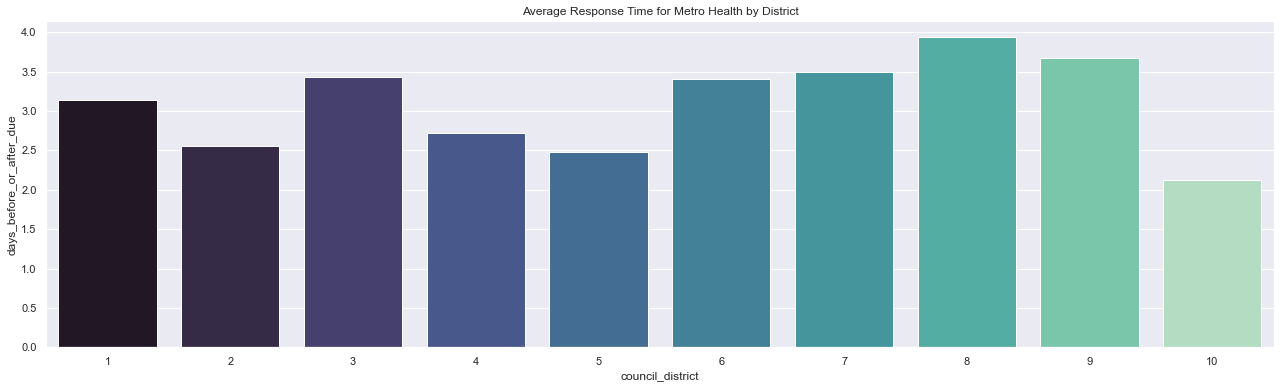

In [54]:
# Average response time by district for metro health department.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_metro_df, x = 'council_district', y = 'days_before_or_after_due', palette = "mako").set_title('Average Response Time for Metro Health by District')

Text(0.5, 1.0, 'Metro Health Levels of Delay')

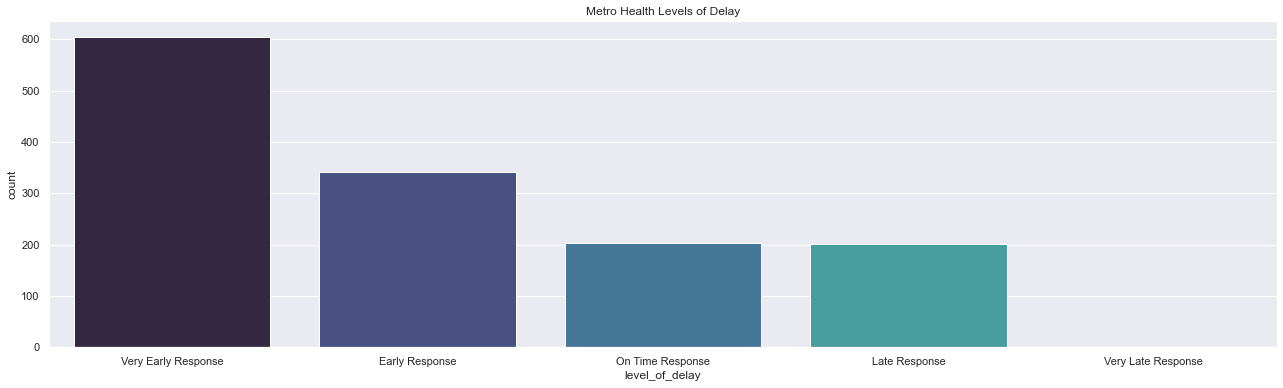

In [55]:
# Counts of level of delay for metro health

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = metro_df, x = 'level_of_delay', palette = "mako").set_title('Metro Health Levels of Delay')

#### Development Services

Text(0.5, 1.0, 'Development Services Calls by District')

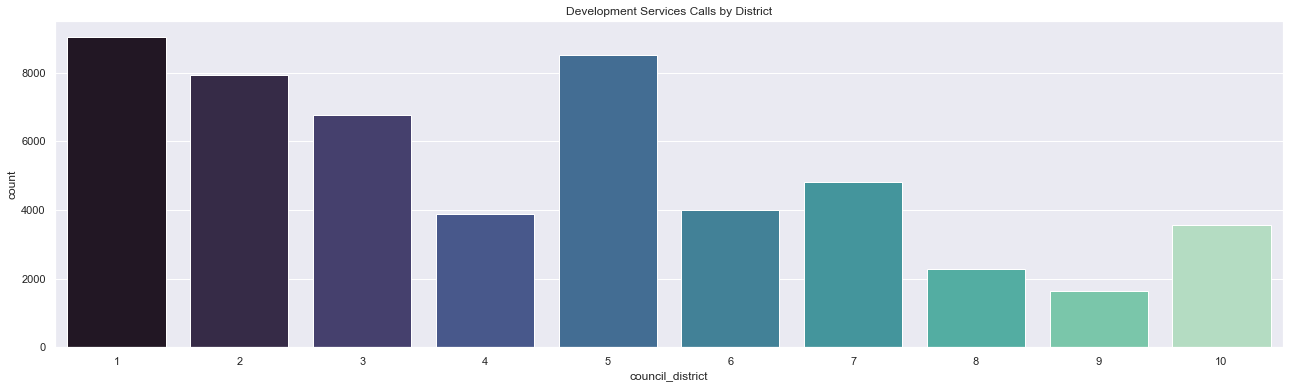

In [56]:
# Counts of reports for development services by council district.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = dev_df, x = 'council_district', palette = "mako").set_title('Development Services Calls by District')

Text(0.5, 1.0, 'Average Response Time for Development Services by District')

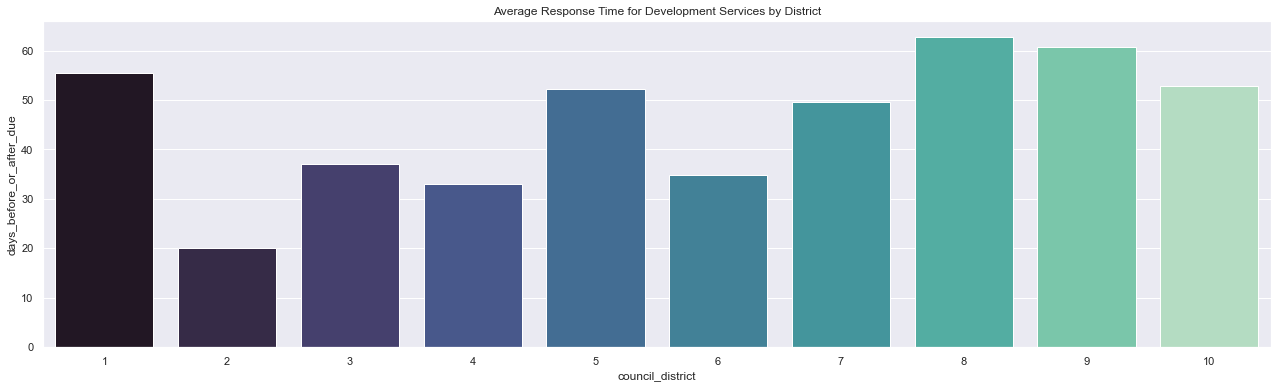

In [57]:
# Average response time by district for development services department.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_dev_df, x = 'council_district', y = 'days_before_or_after_due', palette = "mako").set_title('Average Response Time for Development Services by District')

Text(0.5, 1.0, 'Development Services Levels of Delay')

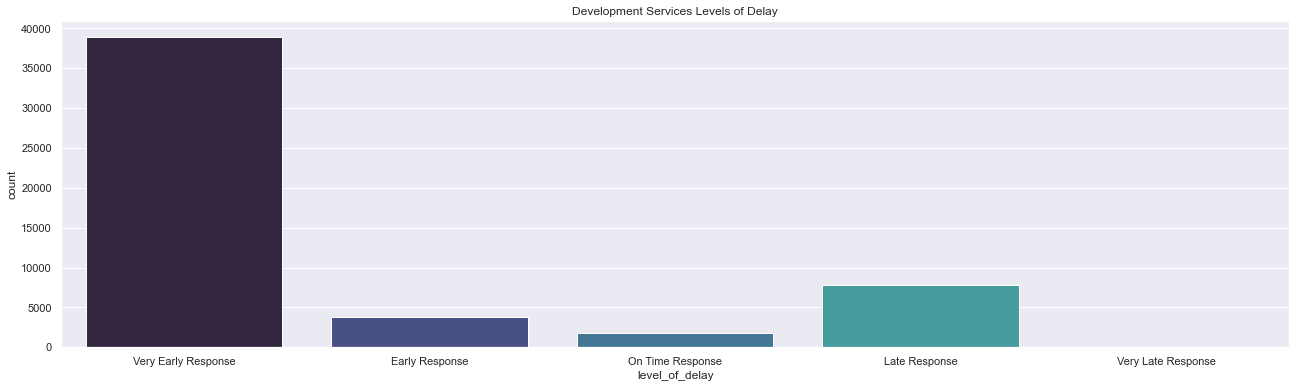

In [58]:
# Counts of level of delay for development services

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = dev_df, x = 'level_of_delay', palette = "mako").set_title('Development Services Levels of Delay')

#### Animal Care Services

Text(0.5, 1.0, 'Animal Care Services Calls by District')

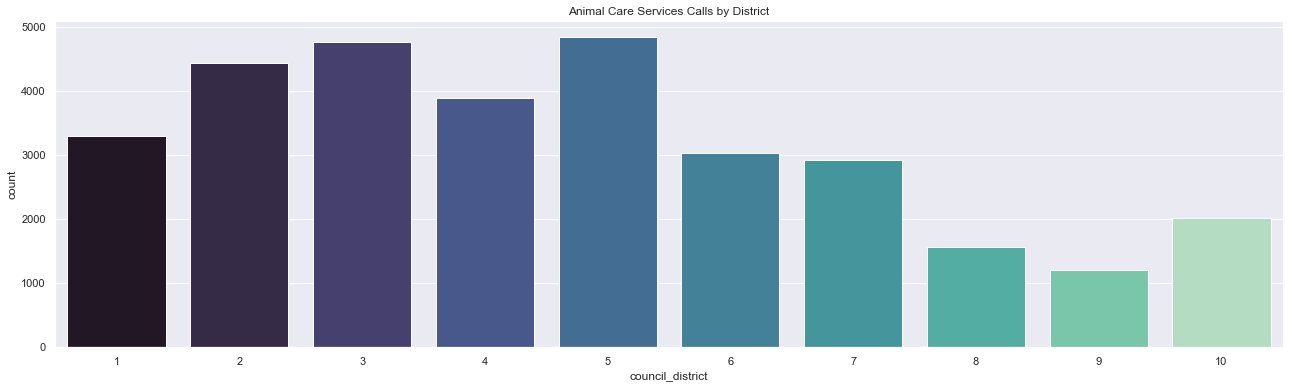

In [59]:
# Counts of reports for animal care services by council district.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = animal_df, x = 'council_district', palette = "mako").set_title('Animal Care Services Calls by District')

Text(0.5, 1.0, 'Average Response Time for Animal Care Services by District')

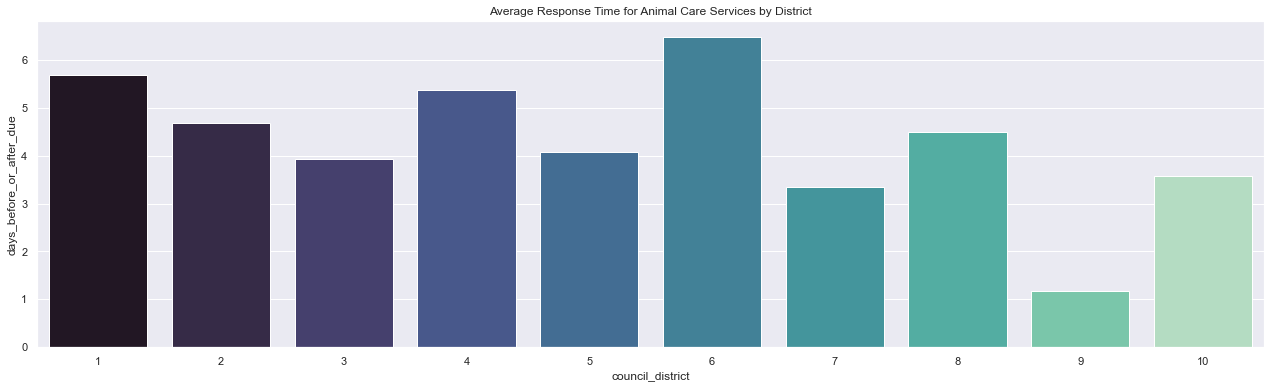

In [60]:
# Average response time by district for animal care services department.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_animal_df, x = 'council_district', y = 'days_before_or_after_due', palette = "mako").set_title('Average Response Time for Animal Care Services by District')

Text(0.5, 1.0, 'Animal Care Levels of Delay')

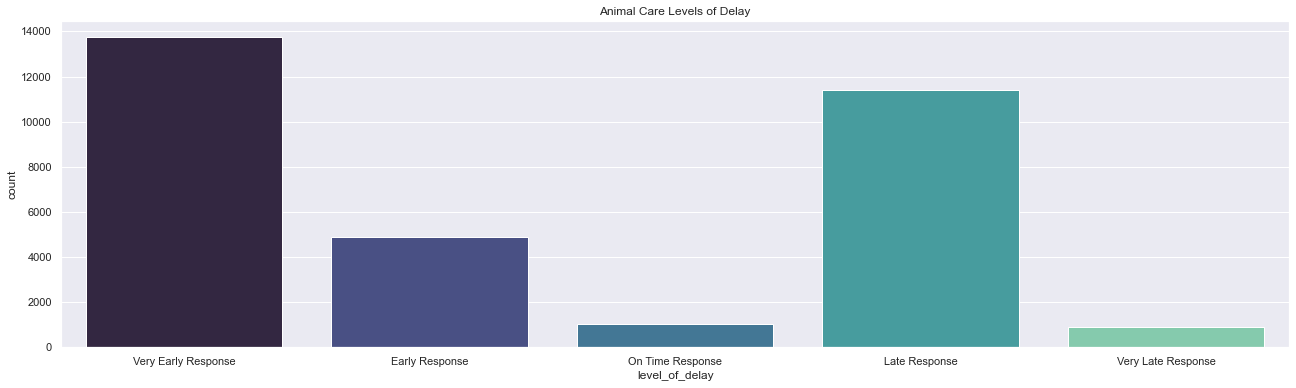

In [61]:
# Counts of level of delay for animal care

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = animal_df, x = 'level_of_delay', palette = "mako").set_title('Animal Care Levels of Delay')

#### Code Enforcement

Text(0.5, 1.0, 'Code Enforcement Services Calls by District')

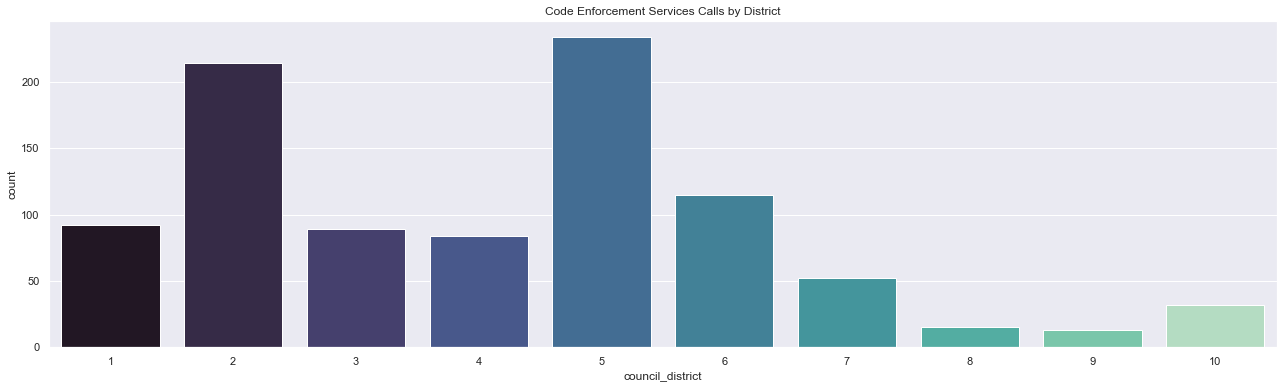

In [62]:
# Counts of reports for code enforcement services by council district.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = code_df, x = 'council_district', palette = "mako").set_title('Code Enforcement Services Calls by District')

Text(0.5, 1.0, 'Average Response Time for Code Enforcement Services by District')

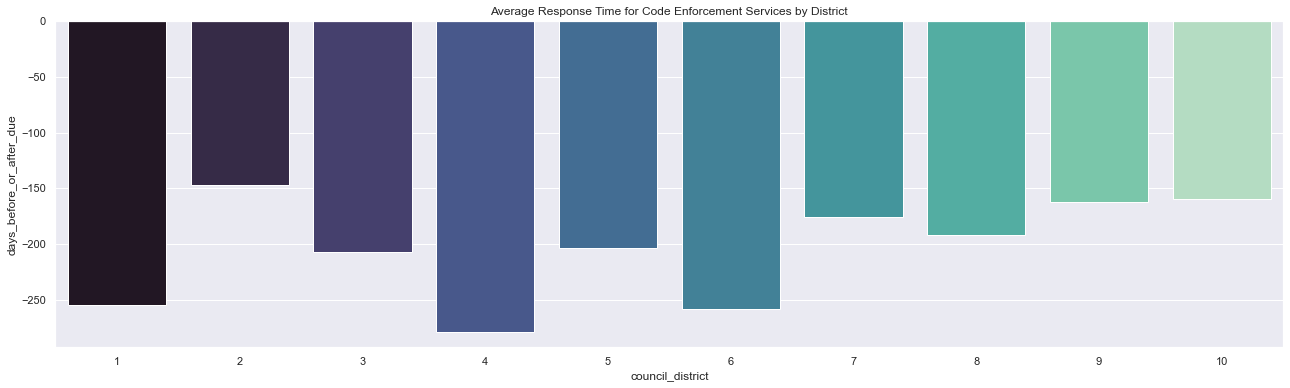

In [63]:
# Average response time by district for code enforcement services department.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_code_df, x = 'council_district', y = 'days_before_or_after_due', palette = "mako").set_title('Average Response Time for Code Enforcement Services by District')

Text(0.5, 1.0, 'Code Enforcement Levels of Delay')

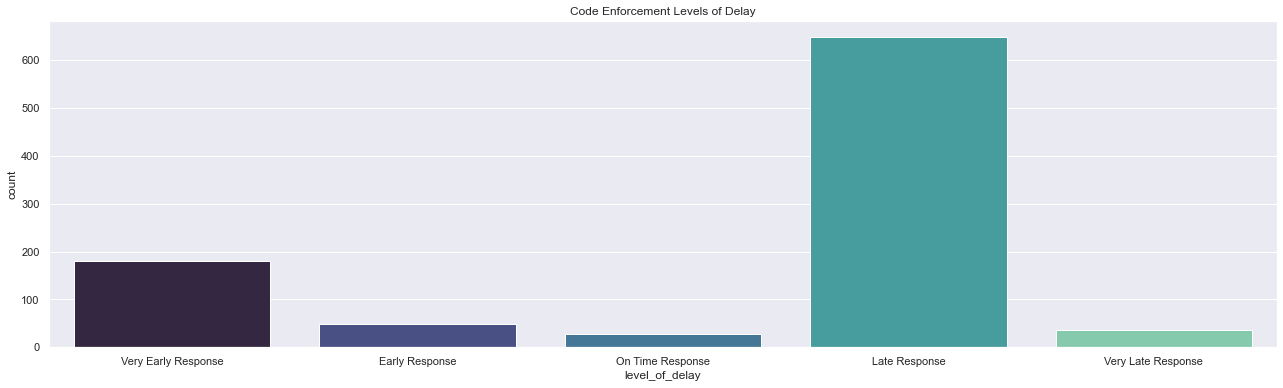

In [64]:
# Counts of level of delay for code enforcement. Mostly late responses

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = code_df, x = 'level_of_delay', palette = "mako").set_title('Code Enforcement Levels of Delay')

#### Parks and Recreation only has two entries sadly

#### Unknown

Text(0.5, 1.0, 'Unknown Department Calls by District')

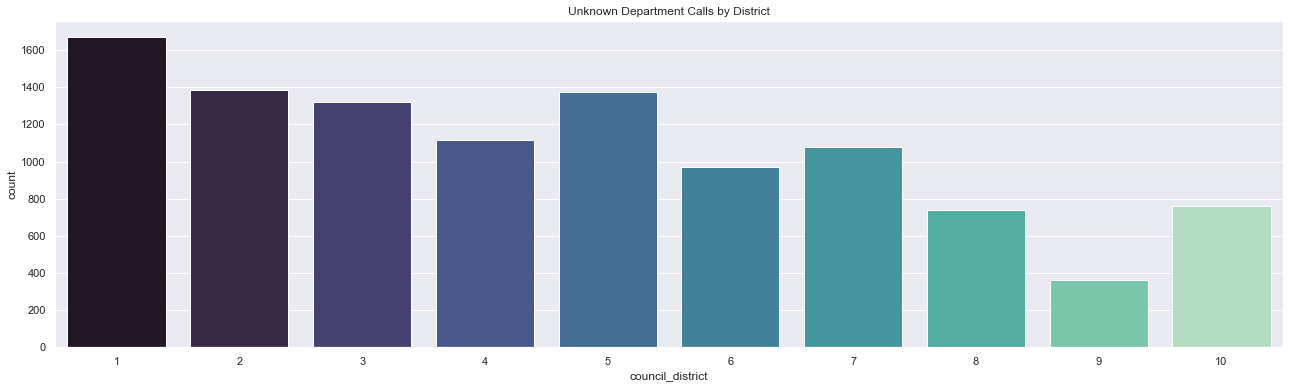

In [65]:
# Counts of reports for unknown department by council district.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = unk_df, x = 'council_district', palette = "mako").set_title('Unknown Department Calls by District')

Text(0.5, 1.0, 'Average Response Time for Unknown Department by District')

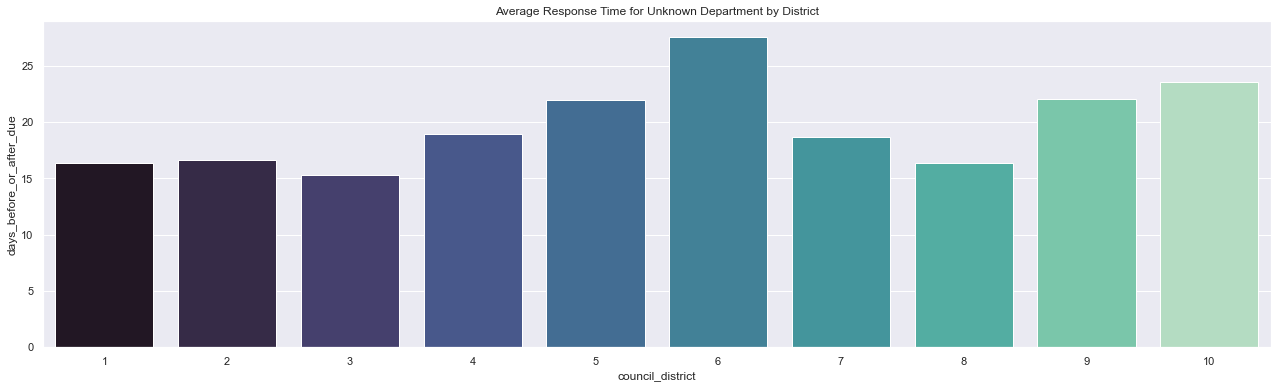

In [66]:
# Average response time by district for unknown department.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_unk_df, x = 'council_district', y = 'days_before_or_after_due', palette = "mako").set_title('Average Response Time for Unknown Department by District')

Text(0.5, 1.0, 'Unknown Department Levels of Delay')

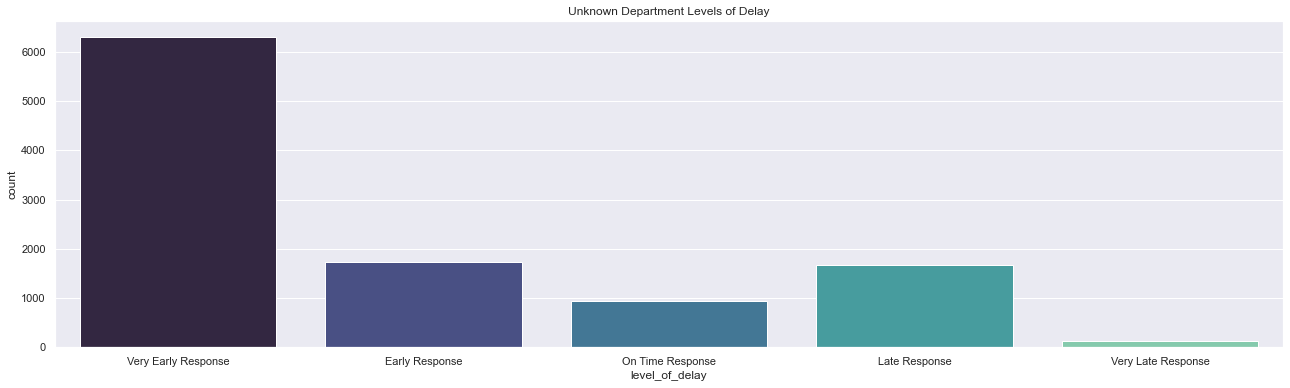

In [67]:
# Counts of level of delay for unknown department calls

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = unk_df, x = 'level_of_delay', palette = "mako").set_title('Unknown Department Levels of Delay')

## Modeling

### Establishing a Baseline

In [68]:
base_top = train[train['level_of_delay'] == 'Very Early Response']
len(base_top)/len(train)

0.5719433461788699

### Prep for Modeling

In [69]:
df = model_df()
df = df.drop(columns = ['council_district', 'source_id', 'dept', 'call_reason'])
train, validate, test = wrangle.split(df, stratify_by = 'level_of_delay')
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.separate_y(train, validate, test)

In [70]:
def scale_data(X_train, X_validate, X_test):
    '''
    This function will scale numeric data using Min Max transform after 
    it has already been split into train, validate, and test.
    '''
    
    # Make the thing
    scaler = sklearn.preprocessing.MinMaxScaler()
    
   
    # we only .fit on the training data
    scaler.fit(X_train)
    train_scaled = scaler.transform(X_train)
    validate_scaled = scaler.transform(X_validate)
    test_scaled = scaler.transform(X_test)
    
    # turn the numpy arrays into dataframes
    train_scaled = pd.DataFrame(train_scaled, columns=X_train.columns)
    validate_scaled = pd.DataFrame(validate_scaled, columns=X_train.columns)
    test_scaled = pd.DataFrame(test_scaled, columns=X_train.columns)
    
    
    return train_scaled, validate_scaled, test_scaled

In [71]:
# A function to find how heavily each feature is weighed in the model created

def get_the_weights(rf, x_train):
    feat = rf.feature_importances_
    key = x_train.columns.tolist()
    val = feat.tolist()
    val = [round(num, 2) for num in val]
    res = {key[i]: val[i] for i in range(len(key))} 
    return res

In [72]:
X_train, X_validate, X_test = scale_data(X_train, X_validate, X_test)

### Random Forest Classifier

#### Max depth of 5 min_samples of 2

In [73]:
# Creating the random forest model

rf5 = RandomForestClassifier(max_depth = 5, min_samples_leaf = 2, random_state=123)

# Fitting the random forest model

rf5 = rf5.fit(X_train, y_train)

# Predicting on train

y5_pred = rf5.predict(X_train)

# Results

print(classification_report(y_train, y5_pred))

                     precision    recall  f1-score   support

     Early Response       1.00      0.00      0.00     36971
      Late Response       0.69      0.25      0.37     33599
   On Time Response       0.00      0.00      0.00     11753
Very Early Response       0.61      1.00      0.76    114280
 Very Late Response       1.00      0.48      0.65      3207

           accuracy                           0.62    199810
          macro avg       0.66      0.35      0.36    199810
       weighted avg       0.67      0.62      0.51    199810



In [74]:
# Predicting on validate

y5_val_pred = rf5.predict(X_validate)

# Results

print(classification_report(y_validate, y5_val_pred))

                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     15845
      Late Response       0.69      0.25      0.37     14399
   On Time Response       0.00      0.00      0.00      5037
Very Early Response       0.61      1.00      0.76     48978
 Very Late Response       1.00      0.50      0.66      1374

           accuracy                           0.62     85633
          macro avg       0.46      0.35      0.36     85633
       weighted avg       0.48      0.62      0.51     85633



In [75]:
# Seeing how each variable is weighed
# Seems as though department and resolution days due are the two biggest factors

get_the_weights(rf5, X_train)

{'resolution_days_due': 0.4,
 'district_1': 0.0,
 'district_2': 0.0,
 'district_3': 0.0,
 'district_4': 0.0,
 'district_5': 0.0,
 'district_6': 0.0,
 'district_7': 0.0,
 'district_8': 0.0,
 'district_9': 0.0,
 'district_10': 0.0,
 'voter_turnout_2019': 0.01,
 'num_of_registered_voters': 0.0,
 'open_month': 0.02,
 'open_week': 0.03,
 'per_capita_income': 0.0,
 'animal_care_services': 0.07,
 'code_enforcement_services': 0.01,
 'customer_services': 0.07,
 'development_services': 0.08,
 'metro_health': 0.0,
 'parks_and_rec': 0.0,
 'solid_waste_management': 0.05,
 'trans_and_cap_improvements': 0.0,
 'unknown_dept': 0.0,
 'buildings': 0.0,
 'business': 0.0,
 'cleanup': 0.0,
 'code': 0.07,
 'customer_service': 0.03,
 'field': 0.03,
 'land': 0.0,
 'license': 0.0,
 'misc': 0.02,
 'storm': 0.0,
 'streets': 0.0,
 'trades': 0.0,
 'traffic': 0.0,
 'waste': 0.03,
 'web_portal': 0.01,
 '311_mobile_app': 0.01,
 'constituent_call': 0.0,
 'internal_services_requests': 0.01}

#### Max depth of 10 min_samples of 3

In [76]:
# Creating the random forest model

rf10 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 3, random_state=123)

# Fitting the random forest model

rf10 = rf10.fit(X_train, y_train)

# Predicting on train

y10_pred = rf10.predict(X_train)

# Results

print(classification_report(y_train, y10_pred))

                     precision    recall  f1-score   support

     Early Response       0.63      0.19      0.29     36971
      Late Response       0.71      0.30      0.42     33599
   On Time Response       0.00      0.00      0.00     11753
Very Early Response       0.65      0.99      0.79    114280
 Very Late Response       1.00      0.49      0.66      3207

           accuracy                           0.66    199810
          macro avg       0.60      0.39      0.43    199810
       weighted avg       0.63      0.66      0.58    199810



In [77]:
# Predicting on validate

y10_val_pred = rf10.predict(X_validate)

# Results

print(classification_report(y_validate, y10_val_pred))

                     precision    recall  f1-score   support

     Early Response       0.62      0.19      0.29     15845
      Late Response       0.71      0.29      0.42     14399
   On Time Response       0.00      0.00      0.00      5037
Very Early Response       0.65      0.99      0.79     48978
 Very Late Response       1.00      0.50      0.67      1374

           accuracy                           0.66     85633
          macro avg       0.60      0.39      0.43     85633
       weighted avg       0.62      0.66      0.58     85633



In [78]:
get_the_weights(rf10, X_train)

{'resolution_days_due': 0.47,
 'district_1': 0.0,
 'district_2': 0.0,
 'district_3': 0.0,
 'district_4': 0.0,
 'district_5': 0.0,
 'district_6': 0.0,
 'district_7': 0.0,
 'district_8': 0.0,
 'district_9': 0.0,
 'district_10': 0.0,
 'voter_turnout_2019': 0.01,
 'num_of_registered_voters': 0.01,
 'open_month': 0.04,
 'open_week': 0.06,
 'per_capita_income': 0.01,
 'animal_care_services': 0.04,
 'code_enforcement_services': 0.01,
 'customer_services': 0.05,
 'development_services': 0.05,
 'metro_health': 0.0,
 'parks_and_rec': 0.0,
 'solid_waste_management': 0.04,
 'trans_and_cap_improvements': 0.0,
 'unknown_dept': 0.0,
 'buildings': 0.0,
 'business': 0.0,
 'cleanup': 0.0,
 'code': 0.04,
 'customer_service': 0.03,
 'field': 0.03,
 'land': 0.0,
 'license': 0.0,
 'misc': 0.02,
 'storm': 0.0,
 'streets': 0.0,
 'trades': 0.0,
 'traffic': 0.0,
 'waste': 0.03,
 'web_portal': 0.01,
 '311_mobile_app': 0.01,
 'constituent_call': 0.0,
 'internal_services_requests': 0.01}

#### Max depth of 3 min_samples of 2

In [79]:
# Creating the random forest model

rf3 = RandomForestClassifier(max_depth = 3, min_samples_leaf = 2, random_state=123)

# Fitting the random forest model

rf3 = rf3.fit(X_train, y_train)

# Predicting on train

y3_pred = rf3.predict(X_train)

# Results

print(classification_report(y_train, y3_pred))

                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     36971
      Late Response       0.68      0.24      0.36     33599
   On Time Response       0.00      0.00      0.00     11753
Very Early Response       0.61      1.00      0.76    114280
 Very Late Response       1.00      0.46      0.63      3207

           accuracy                           0.62    199810
          macro avg       0.46      0.34      0.35    199810
       weighted avg       0.48      0.62      0.50    199810



In [80]:
# Predicting on validate

y3_val_pred = rf3.predict(X_validate)

# Results

print(classification_report(y_validate, y3_val_pred))

                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     15845
      Late Response       0.69      0.24      0.36     14399
   On Time Response       0.00      0.00      0.00      5037
Very Early Response       0.61      1.00      0.76     48978
 Very Late Response       1.00      0.47      0.64      1374

           accuracy                           0.62     85633
          macro avg       0.46      0.34      0.35     85633
       weighted avg       0.48      0.62      0.50     85633



### Let's try this again w/o low rated features

In [81]:
df = model_df()
df = df.drop(columns = ['council_district', 'source_id', 'dept', 'call_reason'])
train, validate, test = wrangle.split(df, stratify_by = 'level_of_delay')
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.separate_y(train, validate, test)

In [82]:
X_train, X_validate, X_test = scale_data(X_train, X_validate, X_test)

In [83]:
X_train.drop(X_train.columns.difference(['resolution_days_due', 'code_enforcement_services','customer_services',
                                       'development_services','solid_waste_management',
                                       'open_week']),1, inplace=True)
X_validate.drop(X_validate.columns.difference(['resolution_days_due', 'code_enforcement_services','customer_services',
                                       'development_services','solid_waste_management',
                                       'open_week']),1, inplace=True)
X_test.drop(X_test.columns.difference(['resolution_days_due', 'code_enforcement_services','customer_services',
                                       'development_services','solid_waste_management',
                                       'open_week']),1, inplace=True)

#### Max depth of 5 min_samples of 2

In [84]:
# Creating the random forest model

rf5 = RandomForestClassifier(max_depth = 5, min_samples_leaf = 2, random_state=123)

# Fitting the random forest model

rf5 = rf5.fit(X_train, y_train)

# Predicting on train

y5_pred = rf5.predict(X_train)

# Results

print(classification_report(y_train, y5_pred))

                     precision    recall  f1-score   support

     Early Response       0.63      0.23      0.34     36971
      Late Response       0.83      0.22      0.34     33599
   On Time Response       0.00      0.00      0.00     11753
Very Early Response       0.64      0.99      0.78    114280
 Very Late Response       1.00      0.48      0.65      3207

           accuracy                           0.65    199810
          macro avg       0.62      0.38      0.42    199810
       weighted avg       0.64      0.65      0.58    199810



In [85]:
# Predicting on validate

y5_val_pred = rf5.predict(X_validate)

# Results

print(classification_report(y_validate, y5_val_pred))

                     precision    recall  f1-score   support

     Early Response       0.63      0.23      0.34     15845
      Late Response       0.83      0.22      0.34     14399
   On Time Response       0.00      0.00      0.00      5037
Very Early Response       0.64      0.99      0.78     48978
 Very Late Response       1.00      0.50      0.66      1374

           accuracy                           0.65     85633
          macro avg       0.62      0.39      0.43     85633
       weighted avg       0.64      0.65      0.58     85633



In [86]:
get_the_weights(rf5, X_train)

{'resolution_days_due': 0.65,
 'open_week': 0.06,
 'code_enforcement_services': 0.02,
 'customer_services': 0.1,
 'development_services': 0.1,
 'solid_waste_management': 0.08}

#### Max depth of 10 min_samples of 3

In [87]:
# Creating the random forest model

rf10 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 3, random_state=123)

# Fitting the random forest model

rf10 = rf10.fit(X_train, y_train)

# Predicting on train

y10_pred = rf10.predict(X_train)

# Results

print(classification_report(y_train, y10_pred))

                     precision    recall  f1-score   support

     Early Response       0.61      0.26      0.36     36971
      Late Response       0.75      0.29      0.42     33599
   On Time Response       0.62      0.00      0.00     11753
Very Early Response       0.66      0.98      0.79    114280
 Very Late Response       1.00      0.49      0.66      3207

           accuracy                           0.67    199810
          macro avg       0.73      0.40      0.45    199810
       weighted avg       0.67      0.67      0.60    199810



In [88]:
# Predicting on validate

y10_val_pred = rf10.predict(X_validate)

# Results

print(classification_report(y_validate, y10_val_pred))

                     precision    recall  f1-score   support

     Early Response       0.61      0.26      0.36     15845
      Late Response       0.73      0.29      0.41     14399
   On Time Response       0.42      0.00      0.00      5037
Very Early Response       0.66      0.98      0.79     48978
 Very Late Response       1.00      0.50      0.67      1374

           accuracy                           0.66     85633
          macro avg       0.68      0.41      0.45     85633
       weighted avg       0.65      0.66      0.60     85633



In [89]:
# Predicting on validate

y10_val_pred = rf10.predict(X_validate)

# Results

print(classification_report(y_validate, y10_val_pred))

                     precision    recall  f1-score   support

     Early Response       0.61      0.26      0.36     15845
      Late Response       0.73      0.29      0.41     14399
   On Time Response       0.42      0.00      0.00      5037
Very Early Response       0.66      0.98      0.79     48978
 Very Late Response       1.00      0.50      0.67      1374

           accuracy                           0.66     85633
          macro avg       0.68      0.41      0.45     85633
       weighted avg       0.65      0.66      0.60     85633



In [90]:
get_the_weights(rf10, X_train)

{'resolution_days_due': 0.66,
 'open_week': 0.12,
 'code_enforcement_services': 0.02,
 'customer_services': 0.08,
 'development_services': 0.06,
 'solid_waste_management': 0.06}

In [91]:
(y_validate == y10_val_pred).sum()/(y_validate == y10_val_pred).count()

0.6641715226606565

In [92]:
y10_val_df = pd.DataFrame(y10_val_pred, columns = ['prediction'])
y10_val_df['is_late'] = y10_val_df.prediction.apply(lambda x : True if x == 'Late Response' or x == 'Very Late Response' else False)

In [93]:
y_validate_df = pd.DataFrame(y_validate)
y_validate_df['is_late'] = y_validate_df.level_of_delay.apply(lambda x : True if x == 'Late Response' or x == 'Very Late Response' else False)
y_validate_df = y_validate_df.reset_index()

In [94]:
y_validate_df

,index,level_of_delay,is_late
0,251371,Very Early Response,False
1,155223,Very Early Response,False
2,158114,Very Early Response,False
3,218907,Very Early Response,False
4,77030,Late Response,True
...,...,...,...
85628,282926,Early Response,False
85629,385486,Early Response,False
85630,310628,Very Early Response,False
85631,44770,Very Early Response,False


In [95]:
(y_validate_df['is_late'] == y10_val_df['is_late']).sum()/(y_validate_df['is_late'] == y10_val_df['is_late']).count()

0.8591197318790653

In [96]:
y_validate_df.is_late.value_counts()

False    69860
True     15773
Name: is_late, dtype: int64

In [97]:
76981/(76981 + 8652)

0.8989641843681758